In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

1. recipe name: {name of the recipe the comment was posted on}
2. recipe number: {placement of the recipe on the top 100 recipes list}
3. recipe code: {unique id of the recipe used by the site}
4. comment id: {unique id of the comment}
5. user id: {unique id of the user who left the comment}
6. user name: {name of the user}
7. user reputation: {internal score of the site, roughly quantifying the past behavior of the user}
8. create at: {time at which the comment was posted as a Unix timestamp}
9. reply count: {number of replies to the comment}
10. thumbs up: {number of up-votes the comment has received}
11. thumbs down: {number of down-votes the comment has received}
12. stars: {the score on a 1 to 5 scale that the user gave to the recipe. A score of 0 means that no score was given}
13. best score: {score of the comment, likely used by the site the help determine the order in the comments that appear in}
14. text: {the text content of the comment}

unnamed 0: # of times that the recipe was reviewed

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Recipe%20Reviews%20and%20User%20Feedback%20Dataset.csv')

In [3]:
# Convert the 'created_at' column from UNIX timestamp to a readable datetime format
df['created_at'] = pd.to_datetime(df['created_at'], unit='s')
df


,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,2021-06-03 10:59:37,0,0,0,5,100,This Strawberry Cake has been a family favorit...
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,2021-02-11 09:45:20,0,0,0,5,100,<p>I received endless compliments on this cake...
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,2021-06-03 10:57:24,0,0,0,5,100,This cake was delicious and so moist! I didn&#...
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,2021-06-03 10:47:13,0,0,0,5,100,I just made this too. It is wonderful. As fo...


In [4]:
# Calculate the approval rating as a percentage
df['approval_rating'] = (df['thumbs_up'] / (df['thumbs_up'] + df['thumbs_down'])) * 100

# Replace NaN values (e.g., when thumbs_up and thumbs_down are both 0) with 0
df['approval_rating'] = df['approval_rating'].fillna(0)
df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,approval_rating
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ...",0.0
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...,100.0
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...,100.0
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee...",100.0
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,2021-06-03 10:59:37,0,0,0,5,100,This Strawberry Cake has been a family favorit...,0.0
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,2021-02-11 09:45:20,0,0,0,5,100,<p>I received endless compliments on this cake...,0.0
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,2021-06-03 10:57:24,0,0,0,5,100,This cake was delicious and so moist! I didn&#...,0.0
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,2021-06-03 10:47:13,0,0,0,5,100,I just made this too. It is wonderful. As fo...,0.0


In [5]:
# Count the number of reviews for the specific recipe
specific_recipe = "Mamaw Emily’s Strawberry Cake"

# Ensure the recipe_name column exists and count the entries
if 'recipe_name' in df.columns:
    recipe_count = df[df['recipe_name'] == specific_recipe].shape[0]
    print(f"Number of reviews for '{specific_recipe}': {recipe_count}")
else:
    print("The 'recipe_name' column does not exist in the DataFrame.")

Number of reviews for 'Mamaw Emily’s Strawberry Cake': 119


### Duplicate Reviews

In [6]:
# Group by recipe_name and count duplicates in the text column
duplicates_per_recipe = (
    df[df.duplicated(subset=['recipe_name', 'text','user_name' ], keep=False)]  # Filter duplicates
    .groupby('recipe_name')
    .size()
    .reset_index(name='duplicate_count')  # Rename the count column
)

# Display the counts of duplicates per recipe
print(duplicates_per_recipe)

                               recipe_name  duplicate_count
0                Amish Breakfast Casserole                4
1                     Bacon Macaroni Salad                2
2   Banana Bars with Cream Cheese Frosting                2
3                   Best Ever Banana Bread                5
4             Black Bean ‘n’ Pumpkin Chili                4
5                   Blueberry French Toast                4
6                       Caramel Heavenlies                2
7                        Cheeseburger Soup              114
8                  Chicken Penne Casserole                2
9    Chocolate-Strawberry Celebration Cake                5
10                      Creamy White Chili              148
11                   Enchilada Casser-Ole!              179
12                 Favorite Chicken Potpie                8
13                     Flavorful Pot Roast                2
14                  Garlic Beef Enchiladas                2
15                Gluten-Free Banana Bre

In [7]:
# Drop duplicates based on recipe_name and text, keeping the first occurrence
df.drop_duplicates(subset=['recipe_name', 'text'], keep='first', inplace=True)
df

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,approval_rating
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ...",0.0
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...,100.0
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...,100.0
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee...",100.0
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18177,114,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_331352,u_1oKblS4ULpTAACUTILo0QlO5mrN,WhittierCA,1,2021-06-03 10:59:37,0,0,0,5,100,This Strawberry Cake has been a family favorit...,0.0
18178,115,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_204836,u_1oKY7CKLaFQpI3cBCVaxHXAEGbt,susieswan,1,2021-02-11 09:45:20,0,0,0,5,100,<p>I received endless compliments on this cake...,0.0
18179,116,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_301178,u_1oKXBAuHbMDi9nnriVAbJoPqpeQ,blajr,1,2021-06-03 10:57:24,0,0,0,5,100,This cake was delicious and so moist! I didn&#...,0.0
18180,117,100,82745,Mamaw Emily’s Strawberry Cake,sp_aUSaElGf_82745_c_180512,u_1oKVbnueXfnlmYWuYH8xJ0mFxNQ,cafritz,1,2021-06-03 10:47:13,0,0,0,5,100,I just made this too. It is wonderful. As fo...,0.0


### Pre-Processing Text

In [8]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import nltk

# Ensure all values in the 'text' column are strings
df['text'] = df['text'].fillna('').astype(str)

# Ensure NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function for text
def preprocess_text(text):
    # Lowercase text
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove special characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing directly to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelnguyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelnguyen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michaelnguyen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17870 entries, 0 to 18181
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       17870 non-null  int64         
 1   recipe_number    17870 non-null  int64         
 2   recipe_code      17870 non-null  int64         
 3   recipe_name      17870 non-null  object        
 4   comment_id       17870 non-null  object        
 5   user_id          17870 non-null  object        
 6   user_name        17870 non-null  object        
 7   user_reputation  17870 non-null  int64         
 8   created_at       17870 non-null  datetime64[ns]
 9   reply_count      17870 non-null  int64         
 10  thumbs_up        17870 non-null  int64         
 11  thumbs_down      17870 non-null  int64         
 12  stars            17870 non-null  int64         
 13  best_score       17870 non-null  int64         
 14  text             17870 non-null  object    

In [10]:
df.describe()

,Unnamed: 0,recipe_number,recipe_code,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,approval_rating
count,17870.000000,17870.000000,17870.000000,17870.000000,17870,17870.000000,17870.000000,17870.000000,17870.000000,17870.000000,17870.000000
mean,116.881813,39.170733,21788.391438,2.176329,2021-06-15 03:30:19.726189056,0.014885,1.107946,0.558870,4.293621,154.062787,19.217991
min,0.000000,1.000000,386.000000,0.000000,2021-02-11 09:22:16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,12.000000,6086.000000,1.000000,2021-06-03 10:47:16,0.000000,0.000000,0.000000,5.000000,100.000000,0.000000
50%,90.000000,33.000000,14600.000000,1.000000,2021-06-03 10:55:03,0.000000,0.000000,0.000000,5.000000,100.000000,0.000000
75%,146.000000,64.000000,32535.000000,1.000000,2021-06-03 11:02:45,0.000000,0.000000,0.000000,5.000000,100.000000,0.000000
max,724.000000,100.000000,191775.000000,520.000000,2022-10-14 14:00:35,3.000000,106.000000,126.000000,5.000000,946.000000,100.000000
std,109.463095,29.736749,24075.512695,10.098822,NaN,0.139160,4.235054,3.499523,1.538878,142.122931,37.134103


In [11]:
# Drop rows with null values
df = df.dropna()

# Optional: Print the number of rows to verify
print(f"Number of rows after dropping null values: {len(df)}")

Number of rows after dropping null values: 17870


In [12]:
df['stars'].value_counts()

stars
5    13609
0     1646
4     1625
3      481
1      279
2      230
Name: count, dtype: int64

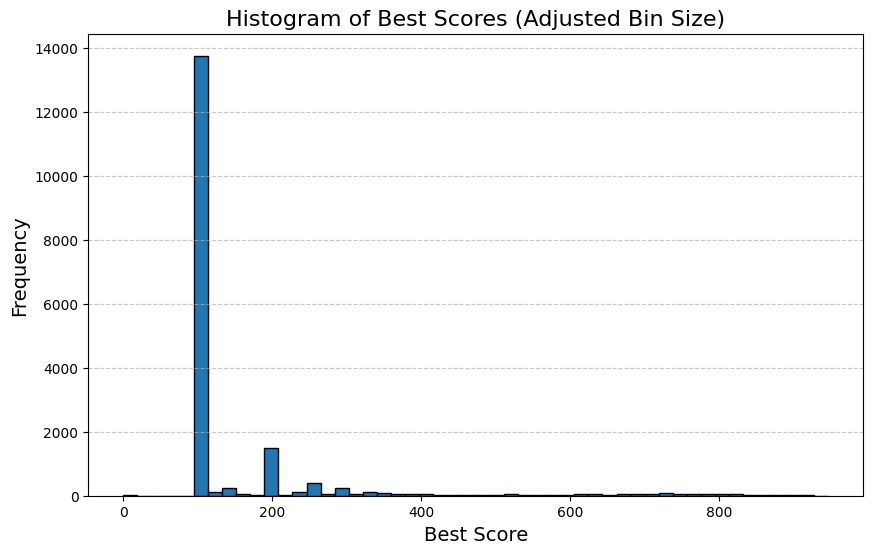

In [13]:
# Adjusted histogram for 'best_score' with more bins
plt.figure(figsize=(10, 6))
plt.hist(df['best_score'], bins=50, edgecolor='black')  # Increased bins to 50
plt.title('Histogram of Best Scores (Adjusted Bin Size)', fontsize=16)
plt.xlabel('Best Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Get the minimum and maximum dates
min_date = df['created_at'].min()
max_date = df['created_at'].max()

print(f"Minimum date: {min_date}")
print(f"Maximum date: {max_date}")

Minimum date: 2021-02-11 09:22:16
Maximum date: 2022-10-14 14:00:35


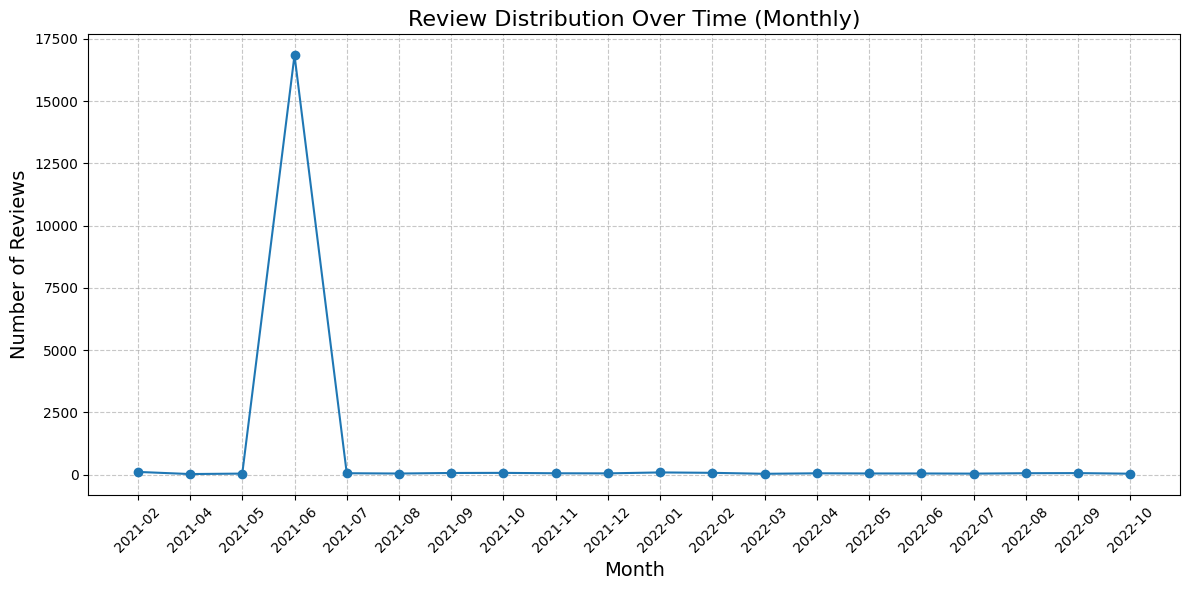

In [15]:
# Group data by month and count reviews
df['month'] = df['created_at'].dt.to_period('M')
monthly_review_distribution = df.groupby('month').size()

# Plot the monthly distribution
plt.figure(figsize=(12, 6))
plt.plot(monthly_review_distribution.index.astype(str), monthly_review_distribution.values, marker='o')
plt.title('Review Distribution Over Time (Monthly)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
df['user_name'].value_counts()

user_name
2124arizona        28
JGa2595176         27
No_Time_To_Cook    25
mjlouk             25
justmbeth          23
                   ..
Terry_V             1
billt1620           1
jjheath             1
Poeschl             1
cafritz             1
Name: count, Length: 13581, dtype: int64

In [17]:
min_rep = df['user_reputation'].min()
max_rep = df['user_reputation'].max()

print(f"Minimum Rep: {min_rep}")
print(f"Maximum Rep: {max_rep}")

Minimum Rep: 0
Maximum Rep: 520


In [18]:
df['user_reputation'].value_counts()

user_reputation
1      16631
10       652
20       284
0        150
30        74
50        18
40        15
80         9
90         7
60         6
100        5
510        3
110        3
70         3
130        2
140        2
160        1
300        1
220        1
170        1
520        1
150        1
Name: count, dtype: int64

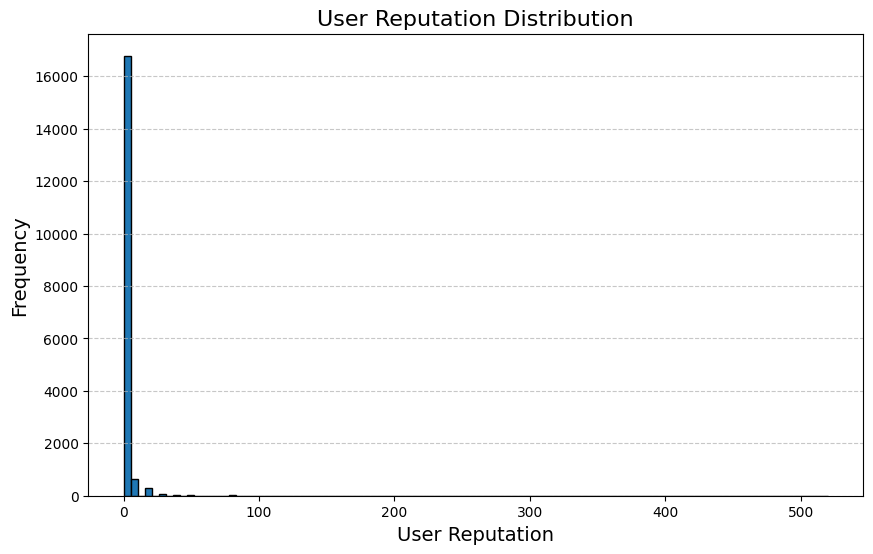

In [19]:
# Plot the histogram for 'user_reputation'
plt.figure(figsize=(10, 6))
plt.hist(df['user_reputation'], bins=100, edgecolor='black')
plt.title('User Reputation Distribution', fontsize=16)
plt.xlabel('User Reputation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [20]:
# Group by recipe_number and compute summary statistics
summary_stats = df.groupby('recipe_number').agg(
    total_comments=('comment_id', 'count'),       # Count of comments
    avg_user_reputation=('user_reputation', 'mean'),  # Average user reputation
    avg_reply_count=('reply_count', 'mean'),     # Average reply count
    avg_thumbs_up=('thumbs_up', 'mean'),         # Average thumbs up
    avg_thumbs_down=('thumbs_down', 'mean'),     # Average thumbs down
    avg_star_rating=('stars', 'mean'),           # Average star rating
    avg_best_score=('best_score', 'mean')        # Average best score
).reset_index()

# Display the results
summary_stats.head(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score
0,1,578,1.451557,0.017301,0.574394,0.250865,4.508651,134.769896
1,2,506,2.136364,0.009881,0.322134,0.130435,4.584980,126.377470
2,3,666,1.681682,0.024024,1.102102,0.732733,4.558559,139.584084
3,4,335,3.029851,0.008955,2.892537,0.979104,4.525373,192.319403
4,5,197,1.477157,0.000000,0.131980,0.065990,4.461929,111.751269
5,6,390,1.384615,0.015385,0.933333,0.382051,4.507692,154.500000
6,7,367,1.880109,0.010899,0.787466,0.457766,4.607629,161.021798
7,8,241,1.070539,0.008299,1.286307,1.087137,4.082988,157.103734
8,9,331,1.416918,0.006042,0.625378,0.238671,4.114804,129.833837
9,10,332,2.259036,0.006024,0.638554,0.361446,4.632530,162.746988


In [21]:
# Add a ratio column for thumbs up to thumbs down
summary_stats['thumbs_up_to_down_ratio'] = summary_stats['avg_thumbs_up'] / summary_stats['avg_thumbs_down']

# Handle cases where thumbs down is 0 to avoid division by zero
summary_stats['thumbs_up_to_down_ratio'] = summary_stats['thumbs_up_to_down_ratio'].replace([float('inf'), -float('inf')], None).fillna(0)

# Display the updated summary table
summary_stats.head(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score,thumbs_up_to_down_ratio
0,1,578,1.451557,0.017301,0.574394,0.250865,4.508651,134.769896,2.289655
1,2,506,2.136364,0.009881,0.322134,0.130435,4.584980,126.377470,2.469697
2,3,666,1.681682,0.024024,1.102102,0.732733,4.558559,139.584084,1.504098
3,4,335,3.029851,0.008955,2.892537,0.979104,4.525373,192.319403,2.954268
4,5,197,1.477157,0.000000,0.131980,0.065990,4.461929,111.751269,2.000000
5,6,390,1.384615,0.015385,0.933333,0.382051,4.507692,154.500000,2.442953
6,7,367,1.880109,0.010899,0.787466,0.457766,4.607629,161.021798,1.720238
7,8,241,1.070539,0.008299,1.286307,1.087137,4.082988,157.103734,1.183206
8,9,331,1.416918,0.006042,0.625378,0.238671,4.114804,129.833837,2.620253
9,10,332,2.259036,0.006024,0.638554,0.361446,4.632530,162.746988,1.766667


In [22]:
summary_stats.tail(10)

,recipe_number,total_comments,avg_user_reputation,avg_reply_count,avg_thumbs_up,avg_thumbs_down,avg_star_rating,avg_best_score,thumbs_up_to_down_ratio
90,91,85,1.329412,0.000000,0.129412,0.023529,3.341176,110.270588,5.500000
91,92,114,4.500000,0.008772,3.114035,1.692982,4.570175,219.684211,1.839378
92,93,109,2.605505,0.000000,0.724771,0.541284,4.321101,150.385321,1.338983
93,94,96,3.197917,0.020833,1.583333,1.197917,4.395833,169.958333,1.321739
94,95,95,3.073684,0.010526,0.821053,0.894737,4.284211,140.326316,0.917647
95,96,109,2.211009,0.000000,0.348624,0.256881,4.440367,143.623853,1.357143
96,97,86,2.430233,0.000000,0.372093,0.220930,3.976744,132.000000,1.684211
97,98,128,6.539062,0.007812,2.992188,1.562500,4.390625,224.265625,1.915000
98,99,112,4.017857,0.000000,1.258929,0.535714,4.258929,188.821429,2.350000
99,100,119,3.336134,0.033613,1.554622,0.789916,4.369748,208.865546,1.968085


In [23]:
top_recipes = df.groupby(['recipe_number', 'recipe_name']).size().reset_index(name='total_comments')
top10 = top_recipes.sort_values(by='recipe_number', ascending=True)

top10.head(10)

,recipe_number,recipe_name,total_comments
0,1,Creamy White Chili,578
1,2,Best Ever Banana Bread,506
2,3,Cheeseburger Soup,666
3,4,Amish Breakfast Casserole,335
4,5,Pumpkin Spice Cupcakes with Cream Cheese Frosting,197
5,6,Favorite Chicken Potpie,390
6,7,Flavorful Chicken Fajitas,367
7,8,Apple Pie,241
8,9,Enchilada Casser-Ole!,331
9,10,Zucchini Pizza Casserole,332


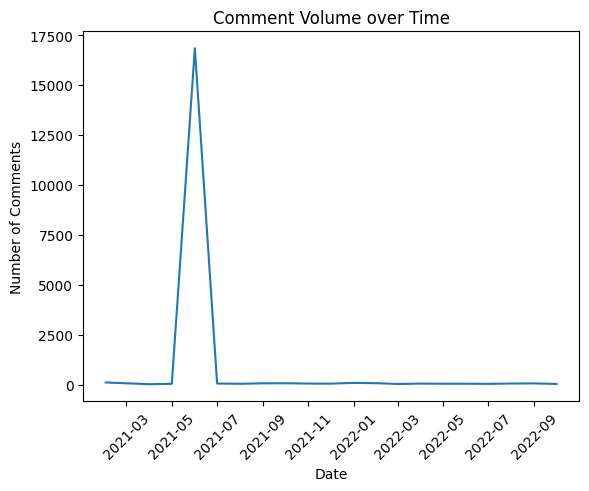

In [24]:
comment_volume = df.groupby(df['created_at'].dt.to_period('M')).size().reset_index(name='comment_count')

plt.plot(comment_volume['created_at'].dt.to_timestamp(), comment_volume['comment_count'])
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Number of Comments')
plt.title('Comment Volume over Time')
plt.show()

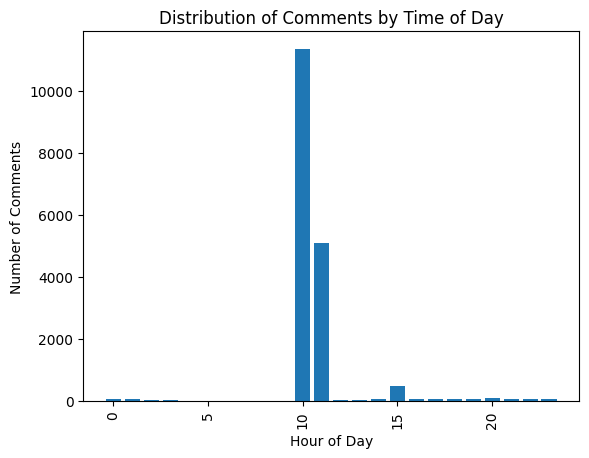

In [25]:
# Majority of comments occur at 10/11 am (Before lunch time to prep the recipe???)

df['hour'] = df['created_at'].dt.hour

hourly_distribution = df.groupby('hour').size().reset_index(name='comment_count')

#Plot the distribution
plt.bar(hourly_distribution['hour'], hourly_distribution['comment_count'])
plt.xlabel('Hour of Day')
plt.xticks(rotation=90)
plt.ylabel('Number of Comments')
plt.title('Distribution of Comments by Time of Day')
plt.show()

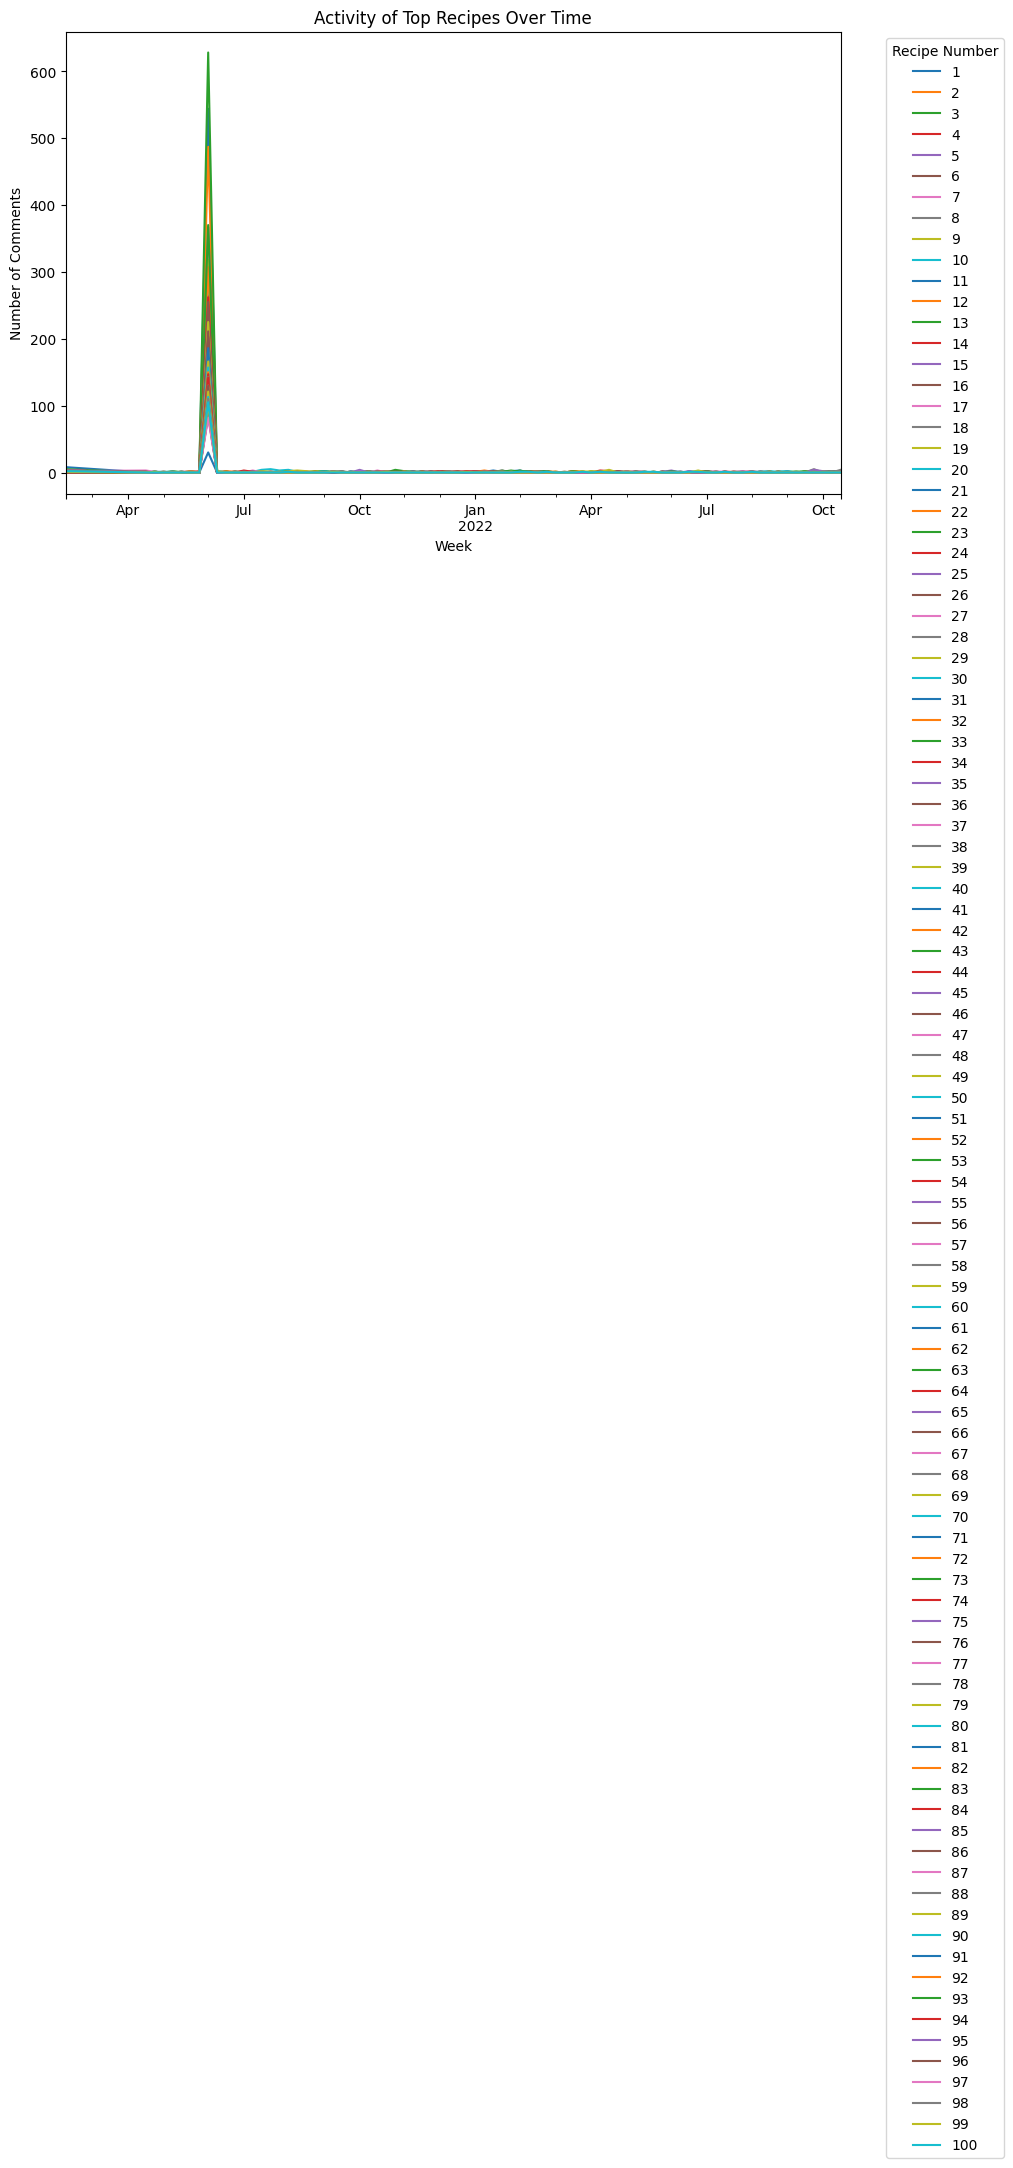

In [26]:
# All the comments were happening in June

# Group by recipe_number and week
recipe_timeline = df.groupby([df['created_at'].dt.to_period('W'), 'recipe_number']).size().unstack(fill_value=0)

# Plot the activity of top recipes
recipe_timeline.plot(figsize=(10, 6))
plt.xlabel('Week')
plt.ylabel('Number of Comments')
plt.title('Activity of Top Recipes Over Time')
plt.legend(title='Recipe Number', bbox_to_anchor=(1.05, 1))
plt.show()

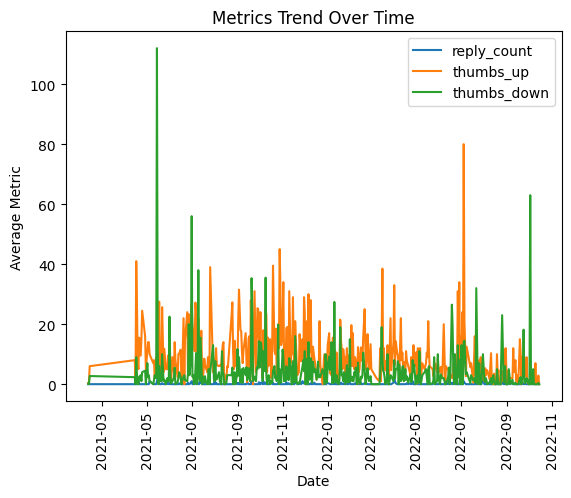

In [27]:
# Group by day and calculate averages
metrics_trend = df.groupby(df['created_at'].dt.to_period('D'))[['reply_count', 'thumbs_up', 'thumbs_down']].mean().reset_index()

# Plot each metric over time
for metric in ['reply_count', 'thumbs_up', 'thumbs_down']:
    plt.plot(metrics_trend['created_at'].dt.to_timestamp(), metrics_trend[metric], label=metric)

plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Average Metric')
plt.title('Metrics Trend Over Time')
plt.legend()
plt.show()

In [28]:
# Sort the dataset by 'thumbs_up' in descending order
top_thumbs_up_comments = df.sort_values(by='thumbs_up', ascending=False)

# Select relevant columns to display (including recipe_number and the full text comment)
top_comments = top_thumbs_up_comments[['recipe_number', 'text', 'thumbs_up']].head(30)

# Display the top comments with the highest thumbs up
top_comments.reset_index()

,index,recipe_number,text,thumbs_up
0,15852,81,goodeasy recipe u snarky bully feel need comme...,106
1,14778,73,fat free half half half half skim milk lot sug...,80
2,13347,62,enjoys review rarely make recipe jawdropping a...,79
3,4191,11,recipe one tends adjust taste said toh altered...,76
4,16497,86,like ingredient portion put together upright m...,76
5,16877,89,remember time long long ago lolwhen mom making...,76
6,4473,12,really liked recipe family make minor change h...,73
7,1192,3,look delicious want make slow cooker anything ...,69
8,3433,9,im always surprised someone change recipe rate...,68
9,17010,90,made company tonight served warm vanilla ice c...,60


In [29]:
# What is the ratio of 5 stars compared to other stars for each recipe

# Count total ratings for each recipe
total_counts = df.groupby('recipe_number').size().reset_index(name='total_ratings')

# Count 5-star ratings for each recipe
five_star_counts = df[df['stars'] == 5].groupby('recipe_number').size().reset_index(name='five_star_count')

# Merge total ratings and 5-star ratings
merged_counts = pd.merge(total_counts, five_star_counts, on='recipe_number', how='left')

# Fill NaN values in five_star_count (for recipes without any 5-star ratings) with 0
merged_counts['five_star_count'] = merged_counts['five_star_count'].fillna(0)

# Calculate the ratio of 5-star ratings to total ratings
merged_counts['five_star_ratio'] = merged_counts['five_star_count'] / merged_counts['total_ratings']

# Display the results
print("Five-Star Ratio for Each Recipe:")
print(merged_counts[['recipe_number', 'five_star_ratio']])

Five-Star Ratio for Each Recipe:
    recipe_number  five_star_ratio
0               1         0.833910
1               2         0.859684
2               3         0.798799
3               4         0.797015
4               5         0.842640
..            ...              ...
95             96         0.752294
96             97         0.651163
97             98         0.773438
98             99         0.660714
99            100         0.739496

[100 rows x 2 columns]


## Sentiment Analysis

The numerical features and textual data provide complementary information that improves the sentiment classification (negative, neutral, or positive). Here’s how they interact and affect the sentiment analysis:

1. Textual Data (TF-IDF)

Textual data captures the semantic content of reviews. Words or phrases often carry direct sentiment information. For example:
	•	Words like “bad,” “terrible,” or “awful” indicate negative sentiment.
	•	Words like “okay” or “average” suggest neutral sentiment.
	•	Words like “excellent,” “amazing,” or “perfect” imply positive sentiment.

By converting this data into TF-IDF vectors, the model learns the importance of specific words in determining the sentiment:
	•	High TF-IDF scores for positive words (e.g., “great,” “love”) lead to higher chances of predicting the review as positive.
	•	Similarly, high TF-IDF scores for negative words (e.g., “poor,” “disappointing”) guide the model toward a negative classification.


2. Numerical Features

Numerical features like approval_rating, user_reputation, reply_count, and best_score provide additional context about the review or reviewer that can influence sentiment prediction:

(a) Approval Rating (approval_rating):
	•	A higher approval rating could correlate with a more positive sentiment.
	•	Example: A user who consistently receives high approval ratings for their reviews is likely to write more positive reviews overall.

(b) User Reputation (user_reputation):
	•	A reviewer with high reputation might have a more critical tone, even in neutral or positive reviews.
	•	Example: A high-reputation user might be more likely to give nuanced feedback, which could alter the sentiment classification.

(c) Reply Count (reply_count):
	•	Reviews with a high reply count might generate stronger sentiments (either positive or negative), as they are more likely to elicit reactions.
	•	Example: A review with many replies could indicate a controversial or strongly worded opinion.

(d) Best Score (best_score):
	•	A high best_score might indicate an exceptional review, likely aligning with positive sentiments.
	•	Example: Reviews with high scores are more likely to be rated positively by other users, implying a positive tone.


3. Effect on the 3 Sentiment Classes

When combined, the numerical features and textual data affect the classification as follows:

Positive Sentiment (4–5 stars)
	•	Text: Words like “excellent,” “love,” or “fantastic” increase the probability of predicting a positive sentiment.
	•	Numerical Features:
	•	High approval_rating reinforces positivity.
	•	High reply_count or best_score adds confidence in the prediction.

Neutral Sentiment (3 stars)
	•	Text: Words like “okay,” “average,” or “fine” suggest neutrality.
	•	Numerical Features:
	•	Moderate approval_rating or user_reputation can help identify neutral reviews.
	•	Low reply_count might indicate less polarizing content.

Negative Sentiment (0–2 stars)
	•	Text: Words like “terrible,” “disappointing,” or “poor” increase the likelihood of negative sentiment classification.
	•	Numerical Features:
	•	Low approval_rating and low best_score further emphasize negative sentiment.

4. How Combined Features Improve Classification

The combination of textual and numerical features creates a richer representation of the reviews:
	•	Textual Data provides context and sentiment-rich signals.
	•	Numerical Features add contextual metadata that may influence sentiment indirectly.

Example:

A review says, “The product is okay but arrived late.”
	•	Text Analysis:
	•	Words like “okay” indicate neutrality, but “arrived late” leans toward negative.
	•	Numerical Data:
	•	If the approval_rating is low and reply_count is high, the classifier might predict a negative sentiment, despite the text being borderline neutral.


In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (replace with your actual dataset if needed)
df = df.dropna(subset=['text', 'stars', 'approval_rating', 'user_reputation', 'reply_count', 'best_score'])  # Ensure no missing values
df = df[df['stars'].between(0, 5)]  # Ensure stars are within valid range

# Map stars to sentiment
def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:  # 4 or 5 stars
        return "positive"

df['sentiment'] = df['stars'].apply(map_star_to_sentiment)

# Encode sentiment labels as integers
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment_encoded'] = df['sentiment'].map(label_mapping)

# Preprocess text, numerical features, and labels
texts = df['text'].astype(str).tolist()
approval_ratings = df['approval_rating'].tolist()
user_reputations = df['user_reputation'].tolist()
reply_counts = df['reply_count'].tolist()
best_scores = df['best_score'].tolist()
labels = df['sentiment_encoded'].tolist()

# Classifying Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing: Use the enhanced sentiment analysis setup
df = df.dropna(subset=['text', 'stars', 'approval_rating', 'user_reputation', 'reply_count', 'best_score'])  # Ensure no missing values
df = df[df['stars'].between(0, 5)]  # Ensure stars are within valid range

# Map stars to sentiment
def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:  # 4 or 5 stars
        return "positive"

df['sentiment_classifier'] = df['stars'].apply(map_star_to_sentiment)

# Encode sentiment labels as integers
label_mapping_classifier = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment_encoded_classifier'] = df['sentiment_classifier'].map(label_mapping_classifier)

# Split dataset
X_text_classifier = df['text'].astype(str)
X_features_classifier = df[['approval_rating', 'user_reputation', 'reply_count', 'best_score']].copy()
y_classifier = df['sentiment_encoded_classifier']

# Split data for training and testing
X_train_text_classifier, X_test_text_classifier, X_train_features_classifier, X_test_features_classifier, y_train_classifier, y_test_classifier = train_test_split(
    X_text_classifier, X_features_classifier, y_classifier, test_size=0.2, random_state=42, stratify=y_classifier
)

# TF-IDF Vectorizer for text
tfidf_vectorizer_classifier = TfidfVectorizer(max_features=5000)
X_train_tfidf_classifier = tfidf_vectorizer_classifier.fit_transform(X_train_text_classifier).toarray()
X_test_tfidf_classifier = tfidf_vectorizer_classifier.transform(X_test_text_classifier).toarray()

# Normalize numerical features
X_train_features_classifier = X_train_features_classifier / X_train_features_classifier.max()
X_test_features_classifier = X_test_features_classifier / X_train_features_classifier.max()

# Combine text and numerical features
X_train_combined_classifier = np.hstack((X_train_tfidf_classifier, X_train_features_classifier))
X_test_combined_classifier = np.hstack((X_test_tfidf_classifier, X_test_features_classifier))

# Model-Specific Features
models_classifier = {
    "Random Forest": {
        "features_train": X_train_combined_classifier,
        "features_test": X_test_combined_classifier,
        "model": RandomForestClassifier(n_estimators=100, random_state=42)
    },
    "Logistic Regression": {
        "features_train": X_train_tfidf_classifier,  # Only text features
        "features_test": X_test_tfidf_classifier,
        "model": LogisticRegression(max_iter=1000, random_state=42)
    },
    "Support Vector Machine (SVM)": {
        "features_train": X_train_features_classifier,  # Only numerical features
        "features_test": X_test_features_classifier,
        "model": SVC(kernel='linear', random_state=42)
    }
}

# Train and Evaluate Models
results_classifier = {}
for model_name, model_info in models_classifier.items():
    print(f"Training {model_name}...")
    model_classifier = model_info["model"]
    X_train_classifier = model_info["features_train"]
    X_test_classifier = model_info["features_test"]

    # Train the model
    model_classifier.fit(X_train_classifier, y_train_classifier)

    # Evaluate the model
    y_pred_classifier = model_classifier.predict(X_test_classifier)
    accuracy_classifier = model_classifier.score(X_test_classifier, y_test_classifier)
    results_classifier[model_name] = accuracy_classifier

    print(f"{model_name} Accuracy: {accuracy_classifier}")
    print("Classification Report:")
    print(classification_report(y_test_classifier, y_pred_classifier, target_names=label_mapping_classifier.keys()))

    # Confusion Matrix
    cm_classifier = confusion_matrix(y_test_classifier, y_pred_classifier)
    sns.heatmap(cm_classifier, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping_classifier.keys(), yticklabels=label_mapping_classifier.keys())
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Summary of Model Accuracies
print("\nModel Accuracy Summary:")
for model_name, accuracy in results_classifier.items():
    print(f"{model_name}: {accuracy:.2f}")

# Deep Learning Models

## Based on Sentiment

## BiRNN

In [ ]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Custom Callback to Monitor F1 Score
class F1ScoreCallback(Callback):
    def __init__(self, validation_data, patience=2):
        super().__init__()
        self.validation_data = validation_data
        self.patience = patience
        self.best_f1 = 0
        self.wait = 0
        self.best_weights = None

    def on_epoch_end(self, epoch, logs=None):
        val_x, val_y_true = self.validation_data
        val_y_pred_probs = self.model.predict(val_x)
        val_y_pred = np.argmax(val_y_pred_probs, axis=1)
        current_f1 = f1_score(val_y_true, val_y_pred, average='macro')
        
        print(f"Epoch {epoch + 1}: Macro F1 Score = {current_f1:.4f}")
        
        # Save the best weights if F1 improves
        if current_f1 > self.best_f1:
            self.best_f1 = current_f1
            self.best_weights = self.model.get_weights()
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                print("Early stopping triggered due to no improvement in Macro F1 Score.")
                self.model.stop_training = True

    def on_train_end(self, logs=None):
        if self.best_weights:
            self.model.set_weights(self.best_weights)

# Step 1: Preprocess the dataset
bidir_df = df.dropna(subset=['text', 'stars', 'approval_rating', 'user_reputation', 'reply_count', 'best_score'])
bidir_df = bidir_df[bidir_df['stars'].between(0, 5)]

def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:
        return "positive"

bidir_df['sentiment'] = bidir_df['stars'].apply(map_star_to_sentiment)
bidir_label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
bidir_df['sentiment_encoded'] = bidir_df['sentiment'].map(bidir_label_mapping)

bidir_texts = bidir_df['text'].astype(str).tolist()
bidir_labels = bidir_df['sentiment_encoded'].tolist()

# Additional numerical features
bidir_approval = bidir_df['approval_rating'].tolist()
bidir_reputation = bidir_df['user_reputation'].tolist()
bidir_reply = bidir_df['reply_count'].tolist()
bidir_score = bidir_df['best_score'].tolist()

# Split data
bidir_X_train_text, bidir_X_test_text, bidir_y_train, bidir_y_test, bidir_X_train_approval, bidir_X_test_approval, \
bidir_X_train_reputation, bidir_X_test_reputation, bidir_X_train_reply, bidir_X_test_reply, \
bidir_X_train_score, bidir_X_test_score = train_test_split(
    bidir_texts, bidir_labels, bidir_approval, bidir_reputation, bidir_reply, bidir_score, 
    test_size=0.2, random_state=42
)

# Normalize numerical features
bidir_X_train_approval = np.array(bidir_X_train_approval).reshape(-1, 1) / 100.0
bidir_X_test_approval = np.array(bidir_X_test_approval).reshape(-1, 1) / 100.0
bidir_X_train_reputation = np.array(bidir_X_train_reputation).reshape(-1, 1) / max(bidir_reputation)
bidir_X_test_reputation = np.array(bidir_X_test_reputation).reshape(-1, 1) / max(bidir_reputation)
bidir_X_train_reply = np.array(bidir_X_train_reply).reshape(-1, 1) / max(bidir_reply)
bidir_X_test_reply = np.array(bidir_X_test_reply).reshape(-1, 1) / max(bidir_reply)
bidir_X_train_score = np.array(bidir_X_train_score).reshape(-1, 1) / max(bidir_score)
bidir_X_test_score = np.array(bidir_X_test_score).reshape(-1, 1) / max(bidir_score)

bidir_X_train_numerical = np.hstack((
    bidir_X_train_approval, bidir_X_train_reputation, bidir_X_train_reply, bidir_X_train_score
))
bidir_X_test_numerical = np.hstack((
    bidir_X_test_approval, bidir_X_test_reputation, bidir_X_test_reply, bidir_X_test_score
))

# Tokenize and pad the text data
bidir_max_vocab_size = 5000
bidir_max_sequence_length = 100

bidir_tokenizer = Tokenizer(num_words=bidir_max_vocab_size, oov_token="<OOV>")
bidir_tokenizer.fit_on_texts(bidir_X_train_text)

bidir_X_train_seq = bidir_tokenizer.texts_to_sequences(bidir_X_train_text)
bidir_X_test_seq = bidir_tokenizer.texts_to_sequences(bidir_X_test_text)

bidir_X_train_padded = pad_sequences(bidir_X_train_seq, maxlen=bidir_max_sequence_length, padding='post', truncating='post')
bidir_X_test_padded = pad_sequences(bidir_X_test_seq, maxlen=bidir_max_sequence_length, padding='post', truncating='post')

# Step 4: Define the BiRNN model
def build_bidir_model_with_numerical(units=64, dropout_rate=0.5, learning_rate=1e-3):
    # Text input and embedding
    text_input = tf.keras.layers.Input(shape=(bidir_max_sequence_length,))
    embedding = tf.keras.layers.Embedding(input_dim=bidir_max_vocab_size, output_dim=64)(text_input)
    birnn = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units, return_sequences=False))(embedding)
    
    # Numerical features input
    numerical_input = tf.keras.layers.Input(shape=(bidir_X_train_numerical.shape[1],))
    combined = tf.keras.layers.Concatenate()([birnn, numerical_input])
    
    # Dense and output layers
    dense = tf.keras.layers.Dense(units, activation='relu')(combined)
    dropout = tf.keras.layers.Dropout(dropout_rate)(dense)
    outputs = tf.keras.layers.Dense(5, activation='softmax')(dropout)
    
    model = tf.keras.Model(inputs=[text_input, numerical_input], outputs=outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Train and evaluate with hyperparameter tuning
best_f1_score = 0
best_params = {}

units_list = [64]
dropout_rates = [0.3, 0.5]
learning_rates = [1e-3]

for units in units_list:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:
            print(f"Testing configuration: units={units}, dropout_rate={dropout_rate}, learning_rate={learning_rate}")
            
            bidir_model = build_bidir_model_with_numerical(units, dropout_rate, learning_rate)
            
            f1_callback = F1ScoreCallback(validation_data=(
                [bidir_X_test_padded, bidir_X_test_numerical], bidir_y_test
            ), patience=2)
            
            history = bidir_model.fit(
                [bidir_X_train_padded, bidir_X_train_numerical], np.array(bidir_y_train),
                validation_data=(
                    [bidir_X_test_padded, bidir_X_test_numerical], np.array(bidir_y_test)
                ),
                epochs=10,
                batch_size=32,
                callbacks=[f1_callback],
                verbose=1
            )
            
            bidir_y_pred_probs = bidir_model.predict([bidir_X_test_padded, bidir_X_test_numerical])
            bidir_y_pred = np.argmax(bidir_y_pred_probs, axis=1)
            macro_f1 = f1_score(bidir_y_test, bidir_y_pred, average='macro')
            
            if macro_f1 > best_f1_score:
                best_f1_score = macro_f1
                best_params = {
                    'units': units,
                    'dropout_rate': dropout_rate,
                    'learning_rate': learning_rate
                }
                best_model = bidir_model

print(f"\nBest Configuration: {best_params}")
print(f"Best Macro F1 Score: {best_f1_score:.4f}")

bidir_y_pred = np.argmax(best_model.predict([bidir_X_test_padded, bidir_X_test_numerical]), axis=1)
print("Classification Report:")
print(classification_report(bidir_y_test, bidir_y_pred))

cm = confusion_matrix(bidir_y_test, bidir_y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Testing configuration: units=64, dropout_rate=0.3, learning_rate=0.001
Epoch 1/10


/Users/michaelnguyen/Library/Python/3.9/lib/python/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor', 'keras_tensor_3']. Received: the structure of inputs=('*', '*')
  warnings.warn(


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step    accura
Epoch 1: Macro F1 Score = 0.4347
447/447 ━━━━━━━━━━━━━━━━━━━━ 17s 34ms/step - accuracy: 0.8487 - loss: 0.5736 - val_accuracy: 0.8629 - val_loss: 0.4100
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Epoch 2: Macro F1 Score = 0.4497
447/447 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8801 - loss: 0.3738 - val_accuracy: 0.8621 - val_loss: 0.4204
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 
Epoch 3: Macro F1 Score = 0.4560
447/447 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.8927 - loss: 0.3353 - val_accuracy: 0.8562 - val_loss: 0.4379
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Epoch 4: Macro F1 Score = 0.4731
447/447 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9056 - loss: 0.2841 - val_accuracy: 0.8607 - val_loss: 0.4517
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step 
Epoch 5: Macro F1 Score = 0.5136
447/447 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9197 - loss: 0.2535 - val_accuracy: 0.836

## AttBiRNN

In [ ]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Attention Layer
class Attention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="attention_weight", shape=(input_shape[-1], 1),
                                 initializer="glorot_uniform", trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.dot(x, self.W)
        e = tf.keras.backend.squeeze(e, axis=-1)
        alpha = tf.keras.backend.softmax(e)
        alpha = tf.keras.backend.expand_dims(alpha, axis=-1)
        context = x * alpha
        context = tf.keras.backend.sum(context, axis=1)
        return context

# Custom Callback to Monitor F1 Score
class F1ScoreCallback(Callback):
    def __init__(self, validation_data, patience=2):
        super().__init__()
        self.validation_data = validation_data
        self.patience = patience
        self.best_f1 = 0
        self.wait = 0
        self.best_weights = None

    def on_epoch_end(self, epoch, logs=None):
        val_x, val_y_true = self.validation_data
        val_y_pred_probs = self.model.predict(val_x)
        val_y_pred = np.argmax(val_y_pred_probs, axis=1)
        current_f1 = f1_score(val_y_true, val_y_pred, average='macro')
        
        print(f"Epoch {epoch + 1}: Macro F1 Score = {current_f1:.4f}")
        
        # Save the best weights if F1 improves
        if current_f1 > self.best_f1:
            self.best_f1 = current_f1
            self.best_weights = self.model.get_weights()
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                print("Early stopping triggered due to no improvement in Macro F1 Score.")
                self.model.stop_training = True

    def on_train_end(self, logs=None):
        if self.best_weights:
            self.model.set_weights(self.best_weights)

# Step 1: Preprocess the dataset
attbirnn_df = df.dropna(subset=['text', 'stars', 'approval_rating', 'user_reputation', 'reply_count', 'best_score'])
attbirnn_df = attbirnn_df[attbirnn_df['stars'].between(0, 5)]

def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:
        return "positive"

attbirnn_df['sentiment'] = attbirnn_df['stars'].apply(map_star_to_sentiment)
attbirnn_label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
attbirnn_df['sentiment_encoded'] = attbirnn_df['sentiment'].map(attbirnn_label_mapping)

attbirnn_texts = attbirnn_df['text'].astype(str).tolist()
attbirnn_labels = attbirnn_df['sentiment_encoded'].tolist()

# Additional numerical features
attbirnn_approval = attbirnn_df['approval_rating'].tolist()
attbirnn_reputation = attbirnn_df['user_reputation'].tolist()
attbirnn_reply = attbirnn_df['reply_count'].tolist()
attbirnn_score = attbirnn_df['best_score'].tolist()

# Split data
attbirnn_X_train_text, attbirnn_X_test_text, attbirnn_y_train, attbirnn_y_test, attbirnn_X_train_approval, attbirnn_X_test_approval, \
attbirnn_X_train_reputation, attbirnn_X_test_reputation, attbirnn_X_train_reply, attbirnn_X_test_reply, \
attbirnn_X_train_score, attbirnn_X_test_score = train_test_split(
    attbirnn_texts, attbirnn_labels, attbirnn_approval, attbirnn_reputation, attbirnn_reply, attbirnn_score, 
    test_size=0.2, random_state=42
)

# Normalize numerical features
attbirnn_X_train_approval = np.array(attbirnn_X_train_approval).reshape(-1, 1) / 100.0
attbirnn_X_test_approval = np.array(attbirnn_X_test_approval).reshape(-1, 1) / 100.0
attbirnn_X_train_reputation = np.array(attbirnn_X_train_reputation).reshape(-1, 1) / max(attbirnn_reputation)
attbirnn_X_test_reputation = np.array(attbirnn_X_test_reputation).reshape(-1, 1) / max(attbirnn_reputation)
attbirnn_X_train_reply = np.array(attbirnn_X_train_reply).reshape(-1, 1) / max(attbirnn_reply)
attbirnn_X_test_reply = np.array(attbirnn_X_test_reply).reshape(-1, 1) / max(attbirnn_reply)
attbirnn_X_train_score = np.array(attbirnn_X_train_score).reshape(-1, 1) / max(attbirnn_score)
attbirnn_X_test_score = np.array(attbirnn_X_test_score).reshape(-1, 1) / max(attbirnn_score)

attbirnn_X_train_numerical = np.hstack((
    attbirnn_X_train_approval, attbirnn_X_train_reputation, attbirnn_X_train_reply, attbirnn_X_train_score
))
attbirnn_X_test_numerical = np.hstack((
    attbirnn_X_test_approval, attbirnn_X_test_reputation, attbirnn_X_test_reply, attbirnn_X_test_score
))

# Tokenize and pad the text data
attbirnn_max_vocab_size = 5000
attbirnn_max_sequence_length = 100

attbirnn_tokenizer = Tokenizer(num_words=attbirnn_max_vocab_size, oov_token="<OOV>")
attbirnn_tokenizer.fit_on_texts(attbirnn_X_train_text)

attbirnn_X_train_seq = attbirnn_tokenizer.texts_to_sequences(attbirnn_X_train_text)
attbirnn_X_test_seq = attbirnn_tokenizer.texts_to_sequences(attbirnn_X_test_text)

attbirnn_X_train_padded = pad_sequences(attbirnn_X_train_seq, maxlen=attbirnn_max_sequence_length, padding='post', truncating='post')
attbirnn_X_test_padded = pad_sequences(attbirnn_X_test_seq, maxlen=attbirnn_max_sequence_length, padding='post', truncating='post')

# Step 4: Define the AttBiRNN model
def build_attbirnn_model_with_numerical(units=64, dropout_rate=0.5, learning_rate=1e-3):
    # Text input and embedding
    text_input = tf.keras.layers.Input(shape=(attbirnn_max_sequence_length,))
    embedding = tf.keras.layers.Embedding(input_dim=attbirnn_max_vocab_size, output_dim=64)(text_input)
    birnn = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units, return_sequences=True))(embedding)
    attention = Attention()(birnn)
    
    # Numerical features input
    numerical_input = tf.keras.layers.Input(shape=(attbirnn_X_train_numerical.shape[1],))
    combined = tf.keras.layers.Concatenate()([attention, numerical_input])
    
    # Dense and output layers
    dense = tf.keras.layers.Dense(units, activation='relu')(combined)
    dropout = tf.keras.layers.Dropout(dropout_rate)(dense)
    outputs = tf.keras.layers.Dense(5, activation='softmax')(dropout)
    
    model = tf.keras.Model(inputs=[text_input, numerical_input], outputs=outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Step 5: Train and evaluate with hyperparameter tuning
best_f1_score = 0
best_params = {}

units_list = [64]
dropout_rates = [0.3, 0.5]
learning_rates = [1e-3]

for units in units_list:
    for dropout_rate in dropout_rates:
        for learning_rate in learning_rates:
            print(f"Testing configuration: units={units}, dropout_rate={dropout_rate}, learning_rate={learning_rate}")
            
            attbirnn_model = build_attbirnn_model_with_numerical(units, dropout_rate, learning_rate)
            
            f1_callback = F1ScoreCallback(validation_data=(
                [attbirnn_X_test_padded, attbirnn_X_test_numerical], attbirnn_y_test
            ), patience=2)
            
            history = attbirnn_model.fit(
                [attbirnn_X_train_padded, attbirnn_X_train_numerical], np.array(attbirnn_y_train),
                validation_data=(
                    [attbirnn_X_test_padded, attbirnn_X_test_numerical], np.array(attbirnn_y_test)
                ),
                epochs=10,
                batch_size=32,
                callbacks=[f1_callback],
                verbose=1
            )
            
            attbirnn_y_pred_probs = attbirnn_model.predict([attbirnn_X_test_padded, attbirnn_X_test_numerical])
            attbirnn_y_pred = np.argmax(attbirnn_y_pred_probs, axis=1)
            macro_f1 = f1_score(attbirnn_y_test, attbirnn_y_pred, average='macro')
            
            if macro_f1 > best_f1_score:
                best_f1_score = macro_f1
                best_params = {
                    'units': units,
                    'dropout_rate': dropout_rate,
                    'learning_rate': learning_rate
                }
                best_model = attbirnn_model

print(f"\nBest Configuration: {best_params}")
print(f"Best Macro F1 Score: {best_f1_score:.4f}")

attbirnn_y_pred = np.argmax(best_model.predict([attbirnn_X_test_padded, attbirnn_X_test_numerical]), axis=1)
print("Classification Report:")
print(classification_report(attbirnn_y_test, attbirnn_y_pred))

cm = confusion_matrix(attbirnn_y_test, attbirnn_y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## LSTM

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Concatenate, Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import keras_tuner as kt
import matplotlib.pyplot as plt
import seaborn as sns
import tempfile

# Step 1: Data Preparation
# Clean and process the original DataFrame `df`
df = df.dropna(subset=['text', 'stars', 'approval_rating', 'user_reputation', 'reply_count', 'best_score'])
df = df[df['stars'].between(0, 5)]  # Ensure stars are within valid range

# Map stars to sentiment
def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:  # 4 or 5 stars
        return "positive"

df['sentiment'] = df['stars'].apply(map_star_to_sentiment)

# Encode sentiment labels
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment_encoded'] = df['sentiment'].map(label_mapping)

# Extract features and labels
texts = df['text'].astype(str).tolist()
approval_ratings = df['approval_rating'].tolist()
user_reputations = df['user_reputation'].tolist()
reply_counts = df['reply_count'].tolist()
best_scores = df['best_score'].tolist()
labels = df['sentiment_encoded'].tolist()

# Split the data into training and testing sets
X_train_text, X_test_text, X_train_rating, X_test_rating, X_train_reputation, X_test_reputation, X_train_reply, X_test_reply, X_train_score, X_test_score, y_train_lstm_combined, y_test_lstm_combined = train_test_split(
    texts, approval_ratings, user_reputations, reply_counts, best_scores, labels, test_size=0.2, random_state=42
)

# Tokenize and Pad Text Data
vocab_size = 5000
max_seq_len = 100

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_seq_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_seq_len, padding='post')

# Normalize numerical features
X_train_rating = np.array(X_train_rating).reshape(-1, 1) / 100.0
X_test_rating = np.array(X_test_rating).reshape(-1, 1) / 100.0
X_train_reputation = np.array(X_train_reputation).reshape(-1, 1) / df['user_reputation'].max()
X_test_reputation = np.array(X_test_reputation).reshape(-1, 1) / df['user_reputation'].max()
X_train_reply = np.array(X_train_reply).reshape(-1, 1) / df['reply_count'].max()
X_test_reply = np.array(X_test_reply).reshape(-1, 1) / df['reply_count'].max()
X_train_score = np.array(X_train_score).reshape(-1, 1) / df['best_score'].max()
X_test_score = np.array(X_test_score).reshape(-1, 1) / df['best_score'].max()

# Combine numerical features into a single array
X_train_numerical = np.hstack((X_train_rating, X_train_reputation, X_train_reply, X_train_score))
X_test_numerical = np.hstack((X_test_rating, X_test_reputation, X_test_reply, X_test_score))

# Use a subset of the data for hyperparameter tuning
subset_size = len(X_train_padded) // 2
X_train_subset_text = X_train_padded[:subset_size]
X_train_subset_num = X_train_numerical[:subset_size]
y_train_subset_lstm_combined = y_train_lstm_combined[:subset_size]

# Step 2: Define the Model for Tuning
def build_lstm_model(hp):
    text_input = Input(shape=(max_seq_len,), name="text_input")
    embedding_layer = Embedding(
        input_dim=vocab_size,
        output_dim=hp.Int("embedding_dim", min_value=64, max_value=128, step=64),
        input_length=max_seq_len
    )(text_input)
    lstm_layer = LSTM(
        units=hp.Int("lstm_units", min_value=64, max_value=128, step=64),
        return_sequences=False
    )(embedding_layer)
    
    numerical_input = Input(shape=(4,), name="numerical_input")
    concatenated = Concatenate()([lstm_layer, numerical_input])
    
    dense_layer = Dense(
        units=hp.Int("dense_units", min_value=64, max_value=128, step=64),
        activation="relu"
    )(concatenated)
    dropout_layer = Dropout(hp.Float("dropout", min_value=0.2, max_value=0.3, step=0.1))(dense_layer)
    output_layer = Dense(3, activation="softmax")(dropout_layer)

    model = tf.keras.models.Model(inputs=[text_input, numerical_input], outputs=output_layer)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float("learning_rate", min_value=1e-4, max_value=1e-3, sampling="log")
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Step 3: Hyperparameter Tuning with Keras Tuner
temp_dir = tempfile.gettempdir()
tuner = kt.Hyperband(
    build_lstm_model,
    objective="val_loss",
    max_epochs=5,
    factor=4,
    directory=temp_dir,
    project_name="lstm_sentiment_tuning_with_num"
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

tuner.search(
    [X_train_subset_text, X_train_subset_num],
    np.array(y_train_subset_lstm_combined),
    validation_split=0.1,
    epochs=5,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# Step 4: Get the Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal embedding dimension is {best_hps.get('embedding_dim')},
with {best_hps.get('lstm_units')} LSTM units,
{best_hps.get('dense_units')} units in the dense layer,
dropout of {best_hps.get('dropout')},
and learning rate of {best_hps.get('learning_rate')}.
""")

# Step 5: Train the Best Model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    [X_train_padded, X_train_numerical],
    np.array(y_train_lstm_combined),
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# Step 6: Evaluate the Model
test_loss_lstm_combined, test_accuracy_lstm_combined = best_model.evaluate(
    [X_test_padded, X_test_numerical], 
    np.array(y_test_lstm_combined), 
    verbose=0
)
print(f"Test Accuracy: {test_accuracy_lstm_combined}")

# Step 7: Predictions and Metrics
y_pred_lstm_combined = np.argmax(best_model.predict([X_test_padded, X_test_numerical]), axis=1)

# Compute macro F1-score
macro_f1_lstm_combined = f1_score(y_test_lstm_combined, y_pred_lstm_combined, average='macro')
print(f"Macro F1-Score: {macro_f1_lstm_combined}")

# Confusion Matrix
cm_lstm_combined = confusion_matrix(y_test_lstm_combined, y_pred_lstm_combined)
sns.heatmap(cm_lstm_combined, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_lstm_combined, y_pred_lstm_combined, target_names=label_mapping.keys()))

## Star Ratings

### Text classification model built using a Deep Neural Network (DNN) architecture with an Embedding Layer and a Global Average Pooling Layer.

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Step 1: Filter valid data
df = df.dropna(subset=['text', 'stars'])
df = df[df['stars'].between(1, 5)]  # Ensure stars values are between 1 and 5

# Step 2: Preprocess the text data
dnn_texts = df['text'].astype(str)
dnn_labels = df['stars']

# Step 3: Split the dataset
dnn_X_train, dnn_X_test, dnn_y_train, dnn_y_test = train_test_split(
    dnn_texts, dnn_labels, test_size=0.2, random_state=42
)

# Step 4: Tokenize text data
dnn_tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
dnn_tokenizer.fit_on_texts(dnn_X_train)

dnn_X_train_seq = dnn_tokenizer.texts_to_sequences(dnn_X_train)
dnn_X_test_seq = dnn_tokenizer.texts_to_sequences(dnn_X_test)

# Step 5: Pad sequences
dnn_max_len = 100
dnn_X_train_padded = pad_sequences(dnn_X_train_seq, maxlen=dnn_max_len, padding='post', truncating='post')
dnn_X_test_padded = pad_sequences(dnn_X_test_seq, maxlen=dnn_max_len, padding='post', truncating='post')

# Convert labels to 0-indexed (since stars are 1-5, subtract 1)
dnn_y_train = dnn_y_train - 1
dnn_y_test = dnn_y_test - 1

# Step 6: Build the model
dnn_num_classes = 5

dnn_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(dnn_num_classes, activation='softmax')  # Softmax for multi-class output
])

dnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',  # Multi-class loss function
                  metrics=[])  # Remove accuracy to calculate F1-score separately

# Step 7: Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=3,          # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the best weights after stopping
)

# Step 8: Train the model
dnn_history = dnn_model.fit(
    dnn_X_train_padded, 
    dnn_y_train, 
    epochs=20,  # Set a higher number of epochs
    validation_data=(dnn_X_test_padded, dnn_y_test),
    batch_size=32,
    callbacks=[early_stopping]  # Add the early stopping callback
)

# Step 9: Evaluate the model
# Predict classes for the test set
dnn_y_test_pred_probs = dnn_model.predict(dnn_X_test_padded)
dnn_y_test_pred = tf.argmax(dnn_y_test_pred_probs, axis=1).numpy()

# Classification Report
dnn_class_report = classification_report(dnn_y_test, dnn_y_test_pred, target_names=[str(i) for i in range(1, 6)])
print("\nClassification Report:")
print(dnn_class_report)

# Calculate F1-score
dnn_f1 = f1_score(dnn_y_test, dnn_y_test_pred, average='weighted')
print(f"Test F1-Score: {dnn_f1:.4f}")

# Step 10: Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(dnn_history.history['loss'], label='Training Loss')
plt.plot(dnn_history.history['val_loss'], label='Validation Loss')
plt.axvline(x=len(dnn_history.history['loss']) - early_stopping.patience - 1, color='red', linestyle='--', label='Early Stopping Triggered')
plt.title('Model Loss with Early Stopping')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The “loss” represents how far off the model’s predictions are from the true labels. Specifically:
	•	Training Loss: Measures the error the model makes on the training data.
	•	Validation Loss: Measures the error the model makes on unseen (validation) data.
    
The graph shows that both training and validation loss decrease over time, meaning the model is learning effectively.

The validation loss is slightly higher than the training loss, which is normal and indicates the model generalizes well. Since the losses flatten at the end and there’s no large gap, the model is not overfitting.

## LSTM

In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the DataFrame for the specific recipe
df_specific = df.copy()

# Filter for the specific recipe
specific_recipe = "Caramel Heavenlies"
df_specific = df_specific.dropna(subset=['text', 'stars', 'recipe_name'])
df_specific = df_specific[df_specific['stars'].between(1, 5)]
df_specific = df_specific[df_specific['recipe_name'] == specific_recipe]

# Check if there are enough reviews for the recipe
if df_specific.shape[0] < 1:
    raise ValueError(f"No reviews found for the recipe '{specific_recipe}'.")

# Preprocess the text and labels
texts_specific = df_specific['text'].astype(str)
labels_specific = df_specific['stars']

# Handle small datasets
if df_specific.shape[0] < 2:
    print(f"Warning: Only {df_specific.shape[0]} review(s) found for '{specific_recipe}'.")
    X_train, X_test, y_train, y_test = texts_specific, texts_specific, labels_specific, labels_specific
else:
    X_train, X_test, y_train, y_test = train_test_split(
        texts_specific, labels_specific, test_size=0.2, random_state=42
    )

# Tokenization and padding
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_len = 150
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# Convert labels to 0-indexed
y_train = y_train - 1
y_test = y_test - 1

# Step 2: Build and Train the LSTM Model
num_classes = 5
model_specific = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model_specific.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=[])

# Train the model
history_specific = model_specific.fit(
    X_train_padded, y_train,
    epochs=10,
    validation_data=(X_test_padded, y_test),
    batch_size=32
)

# Step 3: Evaluate with F1-Score
# Predict and generate predicted classes
y_pred_probs = model_specific.predict(X_test_padded)
y_pred_classes = y_pred_probs.argmax(axis=-1)

# F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print(f"{specific_recipe} Model Test F1-Score: {f1:.4f}")

# Step 4: Classification Report
# Dynamically set target names based on unique classes
unique_classes = sorted(y_test.unique())
target_names = [str(label + 1) for label in unique_classes]  # Adjust to match star ratings

print(f"\n{specific_recipe} Model Classification Report")
print(classification_report(y_test, y_pred_classes, target_names=target_names))

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title(f'Confusion Matrix - {specific_recipe} Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Step 6: Visualize Training and Validation Metrics
# Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(history_specific.history['loss'], label='Training Loss')
plt.plot(history_specific.history['val_loss'], label='Validation Loss')
plt.title(f'{specific_recipe} Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# NLP

## Based on Sentiment Analysis

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv  # Enable HalvingGridSearchCV
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data cleaning and preprocessing
rf_model_df = df.dropna(subset=['text', 'stars', 'approval_rating', 'user_reputation', 'reply_count', 'best_score'])
rf_model_df = rf_model_df[rf_model_df['stars'].between(0, 5)]  # Ensure stars are within valid range

# Map stars to sentiment categories
def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:  # 4 or 5 stars
        return "positive"

rf_model_df['sentiment'] = rf_model_df['stars'].apply(map_star_to_sentiment)

# Encode sentiment labels into integers
rf_sentiment_label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
rf_model_df['sentiment_encoded'] = rf_model_df['sentiment'].map(rf_sentiment_label_mapping)

# Extract features and labels
rf_model_texts = rf_model_df['text'].astype(str).tolist()
rf_model_approval_ratings = rf_model_df['approval_rating'].tolist()
rf_model_user_reputation = rf_model_df['user_reputation'].tolist()
rf_model_reply_count = rf_model_df['reply_count'].tolist()
rf_model_best_score = rf_model_df['best_score'].tolist()
rf_model_labels = rf_model_df['sentiment_encoded'].tolist()

# Split the data into training and testing sets
rf_train_texts, rf_test_texts, rf_train_approval_ratings, rf_test_approval_ratings, rf_train_reputation, rf_test_reputation, \
rf_train_reply_count, rf_test_reply_count, rf_train_best_score, rf_test_best_score, rf_train_labels, rf_test_labels = train_test_split(
    rf_model_texts, rf_model_approval_ratings, rf_model_user_reputation, rf_model_reply_count, rf_model_best_score, rf_model_labels,
    test_size=0.2, random_state=42
)

# Text feature extraction using TF-IDF
rf_tfidf_vectorizer = TfidfVectorizer(max_features=5000)
rf_train_tfidf_features = rf_tfidf_vectorizer.fit_transform(rf_train_texts).toarray()
rf_test_tfidf_features = rf_tfidf_vectorizer.transform(rf_test_texts).toarray()

# Normalize numerical features
rf_normalized_train_approval_ratings = np.array(rf_train_approval_ratings).reshape(-1, 1) / 100.0
rf_normalized_test_approval_ratings = np.array(rf_test_approval_ratings).reshape(-1, 1) / 100.0
rf_normalized_train_reputation = np.array(rf_train_reputation).reshape(-1, 1) / max(rf_model_user_reputation)
rf_normalized_test_reputation = np.array(rf_test_reputation).reshape(-1, 1) / max(rf_model_user_reputation)
rf_normalized_train_reply_count = np.array(rf_train_reply_count).reshape(-1, 1) / max(rf_model_reply_count)
rf_normalized_test_reply_count = np.array(rf_test_reply_count).reshape(-1, 1) / max(rf_model_reply_count)
rf_normalized_train_best_score = np.array(rf_train_best_score).reshape(-1, 1) / max(rf_model_best_score)
rf_normalized_test_best_score = np.array(rf_test_best_score).reshape(-1, 1) / max(rf_model_best_score)

# Combine all features
rf_final_train_features = np.hstack((
    rf_train_tfidf_features,
    rf_normalized_train_approval_ratings,
    rf_normalized_train_reputation,
    rf_normalized_train_reply_count,
    rf_normalized_train_best_score
))
rf_final_test_features = np.hstack((
    rf_test_tfidf_features,
    rf_normalized_test_approval_ratings,
    rf_normalized_test_reputation,
    rf_normalized_test_reply_count,
    rf_normalized_test_best_score
))

# Parameter grid for hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

# Custom scorer for macro F1
rf_macro_f1_scorer = make_scorer(f1_score, average='macro')

# HalvingGridSearchCV for hyperparameter tuning
rf_halving_grid_search = HalvingGridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    scoring=rf_macro_f1_scorer,  # Optimize for macro F1 score
    factor=2,  # Controls the rate of resource reduction
    verbose=1,
    n_jobs=-1
)

# Early stopping mechanism for macro F1
rf_best_macro_f1_score = 0
rf_no_improvement_count = 0
rf_patience = 3  # Number of rounds without improvement before stopping

# Fit the model
rf_halving_grid_search.fit(rf_final_train_features, rf_train_labels)

# Access results and implement early stopping manually
for idx in range(len(rf_halving_grid_search.cv_results_['mean_test_score'])):
    rf_macro_f1_score = rf_halving_grid_search.cv_results_['mean_test_score'][idx]
    print(f"Iteration {idx + 1}: Macro F1 Score = {rf_macro_f1_score:.4f}")

    if rf_macro_f1_score > rf_best_macro_f1_score:
        rf_best_macro_f1_score = rf_macro_f1_score
        rf_no_improvement_count = 0
    else:
        rf_no_improvement_count += 1

    if rf_no_improvement_count >= rf_patience:
        print("Early stopping triggered during hyperparameter tuning.")
        break

# Best parameters from HalvingGridSearchCV
rf_best_rf_classifier = rf_halving_grid_search.best_estimator_
print(f"Best Parameters: {rf_halving_grid_search.best_params_}")

# Evaluate the model
rf_predicted_labels = rf_best_rf_classifier.predict(rf_final_test_features)
rf_sentiment_accuracy = rf_best_rf_classifier.score(rf_final_test_features, rf_test_labels)
rf_macro_f1 = f1_score(rf_test_labels, rf_predicted_labels, average='macro')
print(f"Test Accuracy: {rf_sentiment_accuracy:.2f}")
print(f"Test Macro F1 Score: {rf_macro_f1:.4f}")

# Confusion Matrix Visualization
rf_sentiment_cm = confusion_matrix(rf_test_labels, rf_predicted_labels)
sns.heatmap(rf_sentiment_cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_sentiment_label_mapping.keys(), yticklabels=rf_sentiment_label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(rf_test_labels, rf_predicted_labels, target_names=rf_sentiment_label_mapping.keys()))

## Bi-directional LSTM

In [ ]:
from tensorflow.keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import ParameterGrid
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Step 1: Filter missing or invalid rows
lstm_df = df.dropna(subset=['text', 'stars', 'approval_rating', 'user_reputation', 'reply_count', 'best_score'])
lstm_df = lstm_df[lstm_df['stars'].between(0, 5)]

# Map stars to sentiment categories
def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:
        return "positive"

lstm_df['sentiment'] = lstm_df['stars'].apply(map_star_to_sentiment)
sentiment_label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
lstm_df['sentiment_encoded'] = lstm_df['sentiment'].map(sentiment_label_mapping)

# Extract text, numerical features, and labels
lstm_texts = lstm_df['text'].astype(str).tolist()
lstm_approval_ratings = lstm_df['approval_rating'].tolist()
lstm_user_reputation = lstm_df['user_reputation'].tolist()
lstm_reply_count = lstm_df['reply_count'].tolist()
lstm_best_score = lstm_df['best_score'].tolist()
lstm_labels = lstm_df['sentiment_encoded'].tolist()

# Step 2: Split into train and test sets
lstm_X_train_text, lstm_X_test_text, lstm_X_train_approval, lstm_X_test_approval, \
lstm_X_train_reputation, lstm_X_test_reputation, lstm_X_train_reply, lstm_X_test_reply, \
lstm_X_train_score, lstm_X_test_score, lstm_y_train, lstm_y_test = train_test_split(
    lstm_texts, lstm_approval_ratings, lstm_user_reputation, lstm_reply_count, lstm_best_score, lstm_labels,
    test_size=0.2, random_state=42
)

# Normalize numerical features
lstm_X_train_approval = np.array(lstm_X_train_approval).reshape(-1, 1) / 100.0
lstm_X_test_approval = np.array(lstm_X_test_approval).reshape(-1, 1) / 100.0
lstm_X_train_reputation = np.array(lstm_X_train_reputation).reshape(-1, 1) / max(lstm_user_reputation)
lstm_X_test_reputation = np.array(lstm_X_test_reputation).reshape(-1, 1) / max(lstm_user_reputation)
lstm_X_train_reply = np.array(lstm_X_train_reply).reshape(-1, 1) / max(lstm_reply_count)
lstm_X_test_reply = np.array(lstm_X_test_reply).reshape(-1, 1) / max(lstm_reply_count)
lstm_X_train_score = np.array(lstm_X_train_score).reshape(-1, 1) / max(lstm_best_score)
lstm_X_test_score = np.array(lstm_X_test_score).reshape(-1, 1) / max(lstm_best_score)

lstm_X_train_numerical = np.hstack((
    lstm_X_train_approval, lstm_X_train_reputation, lstm_X_train_reply, lstm_X_train_score
))
lstm_X_test_numerical = np.hstack((
    lstm_X_test_approval, lstm_X_test_reputation, lstm_X_test_reply, lstm_X_test_score
))

# Step 3: Tokenize the text data
lstm_max_words = 5000
lstm_max_len = 50

lstm_tokenizer = Tokenizer(num_words=lstm_max_words, oov_token='<OOV>')
lstm_tokenizer.fit_on_texts(lstm_X_train_text)

lstm_X_train_seq = lstm_tokenizer.texts_to_sequences(lstm_X_train_text)
lstm_X_test_seq = lstm_tokenizer.texts_to_sequences(lstm_X_test_text)

lstm_X_train_padded = pad_sequences(lstm_X_train_seq, maxlen=lstm_max_len, padding='post', truncating='post')
lstm_X_test_padded = pad_sequences(lstm_X_test_seq, maxlen=lstm_max_len, padding='post', truncating='post')

# Step 4: Define the Bidirectional LSTM Model
def build_lstm_model(units=64, dropout_rate=0.5, learning_rate=1e-3):
    text_input = tf.keras.layers.Input(shape=(lstm_max_len,))
    embedding = tf.keras.layers.Embedding(input_dim=lstm_max_words, output_dim=64)(text_input)
    bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units, return_sequences=True))(embedding)
    pooling = tf.keras.layers.GlobalAveragePooling1D()(bi_lstm)
    
    # Numerical input branch
    numerical_input = tf.keras.layers.Input(shape=(lstm_X_train_numerical.shape[1],))
    combined = tf.keras.layers.Concatenate()([pooling, numerical_input])
    
    # Dense layers
    dense = tf.keras.layers.Dense(units, activation='relu')(combined)
    dropout = tf.keras.layers.Dropout(dropout_rate)(dense)
    output = tf.keras.layers.Dense(len(np.unique(lstm_y_train)), activation='softmax')(dropout)
    
    model = tf.keras.Model(inputs=[text_input, numerical_input], outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Step 5: Compute Class Weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(lstm_y_train),
    y=lstm_y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Train the model with class weights
best_macro_f1 = 0
best_params = {}

param_grid = {
    'units': [64],  # Test fewer unit sizes
    'dropout_rate': [0.3],  # Test fewer dropout rates
    'learning_rate': [1e-3]  # Test one learning rate
}

for params in ParameterGrid(param_grid):
    print(f"Testing configuration: {params}")
    lstm_model = build_lstm_model(**params)
    
    # Early stopping callback
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=2, restore_best_weights=True, verbose=1
    )
    
    history = lstm_model.fit(
        [lstm_X_train_padded, lstm_X_train_numerical], np.array(lstm_y_train),
        validation_data=([lstm_X_test_padded, lstm_X_test_numerical], np.array(lstm_y_test)),
        epochs=5,  # Reduce maximum epochs
        batch_size=16,  # Smaller batch size
        callbacks=[early_stopping],
        class_weight=class_weights_dict,  # Add class weights here
        verbose=1
    )
    
    # Evaluate Macro F1 score
    lstm_y_pred_probs = lstm_model.predict([lstm_X_test_padded, lstm_X_test_numerical])
    lstm_y_pred = lstm_y_pred_probs.argmax(axis=1)
    macro_f1 = f1_score(lstm_y_test, lstm_y_pred, average='macro')
    print(f"Macro F1 Score: {macro_f1:.4f}")
    
    if macro_f1 > best_macro_f1:
        best_macro_f1 = macro_f1
        best_params = params
        best_model = lstm_model

# Step 6: Display the Best Configuration
print(f"\nBest Configuration: {best_params}")
print(f"Best Macro F1 Score: {best_macro_f1:.4f}")

# Final Evaluation
lstm_y_pred = best_model.predict([lstm_X_test_padded, lstm_X_test_numerical]).argmax(axis=1)

# Generate classification report with text labels
target_names = list(sentiment_label_mapping.keys())
print("Classification Report:")
print(classification_report(lstm_y_test, lstm_y_pred, target_names=target_names))

## CNN

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, GlobalMaxPooling1D, Embedding, Concatenate, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import keras_tuner as kt
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_model2 = df.dropna(subset=['text', 'stars', 'approval_rating', 'user_reputation', 'reply_count', 'best_score'])
df_model2 = df_model2[df_model2['stars'].between(0, 5)]

# Map stars to sentiment
def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:  # 4 or 5 stars
        return "positive"

df_model2['sentiment'] = df_model2['stars'].apply(map_star_to_sentiment)

# Encode sentiment labels
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df_model2['sentiment_encoded'] = df_model2['sentiment'].map(label_mapping)

# Extract features and labels
texts = df_model2['text'].astype(str).tolist()
approval_ratings = df_model2['approval_rating'].tolist()
user_reputations = df_model2['user_reputation'].tolist()
reply_counts = df_model2['reply_count'].tolist()
best_scores = df_model2['best_score'].tolist()
labels = df_model2['sentiment_encoded'].tolist()

# Split data into training and testing sets
X_train_text, X_test_text, X_train_rating, X_test_rating, X_train_reputation, X_test_reputation, X_train_reply, X_test_reply, X_train_score, X_test_score, y_train, y_test = train_test_split(
    texts, approval_ratings, user_reputations, reply_counts, best_scores, labels, test_size=0.2, random_state=42
)

# Tokenize and pad text data
vocab_size_model2 = 5000
max_seq_len_model2 = 100

tokenizer_model2 = Tokenizer(num_words=vocab_size_model2)
tokenizer_model2.fit_on_texts(texts)

X_train_seq_model2 = tokenizer_model2.texts_to_sequences(X_train_text)
X_test_seq_model2 = tokenizer_model2.texts_to_sequences(X_test_text)

X_train_padded_model2 = pad_sequences(X_train_seq_model2, maxlen=max_seq_len_model2, padding='post')
X_test_padded_model2 = pad_sequences(X_test_seq_model2, maxlen=max_seq_len_model2, padding='post')

# Normalize numerical features
X_train_rating_model2 = np.array(X_train_rating).reshape(-1, 1) / 100.0  # Normalize to 0-1 range
X_test_rating_model2 = np.array(X_test_rating).reshape(-1, 1) / 100.0
X_train_reputation_model2 = np.array(X_train_reputation).reshape(-1, 1) / df_model2['user_reputation'].max()
X_test_reputation_model2 = np.array(X_test_reputation).reshape(-1, 1) / df_model2['user_reputation'].max()
X_train_reply_model2 = np.array(X_train_reply).reshape(-1, 1) / df_model2['reply_count'].max()
X_test_reply_model2 = np.array(X_test_reply).reshape(-1, 1) / df_model2['reply_count'].max()
X_train_score_model2 = np.array(X_train_score).reshape(-1, 1) / df_model2['best_score'].max()
X_test_score_model2 = np.array(X_test_score).reshape(-1, 1) / df_model2['best_score'].max()

# Combine numerical features
X_train_numerical_model2 = np.hstack((X_train_rating_model2, X_train_reputation_model2, X_train_reply_model2, X_train_score_model2))
X_test_numerical_model2 = np.hstack((X_test_rating_model2, X_test_reputation_model2, X_test_reply_model2, X_test_score_model2))

# Define the model with hyperparameter tuning
def build_model(hp):
    text_input = Input(shape=(max_seq_len_model2,), name="text_input")
    embedding = Embedding(
        input_dim=vocab_size_model2,
        output_dim=hp.Int("embedding_dim", min_value=64, max_value=128, step=64),  # Reduced range
        input_length=max_seq_len_model2
    )(text_input)
    conv = Conv1D(
        filters=hp.Int("filters", min_value=32, max_value=64, step=32),  # Reduced range
        kernel_size=hp.Choice("kernel_size", values=[3, 5]),  # Fewer options
        activation="relu"
    )(embedding)
    pool = GlobalMaxPooling1D()(conv)

    # Numerical features input
    numerical_input = Input(shape=(4,), name="numerical_input")
    combined = Concatenate()([pool, numerical_input])

    # Fully connected layers
    fc1 = Dense(hp.Int("units", min_value=64, max_value=128, step=64), activation="relu")(combined)  # Reduced range
    dropout = Dropout(hp.Float("dropout", min_value=0.1, max_value=0.3, step=0.1))(fc1)  # Reduced range
    output = Dense(3, activation="softmax", name="output")(dropout)

    model = Model(inputs=[text_input, numerical_input], outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float("learning_rate", min_value=1e-4, max_value=1e-3, sampling="log")  # Narrow range
        ),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

import tempfile

# Use a temporary writable directory for Keras Tuner
temp_dir = tempfile.gettempdir()

# Create the tuner
tuner = kt.Hyperband(
    build_model,
    objective="val_loss",
    max_epochs=5,  # Reduced epochs
    factor=4,  # Increased reduction factor to reduce trials
    directory=temp_dir,  # Temporary directory for tuner data
    project_name="cnn_tuning_model2"
)

# Perform hyperparameter search with a subset of data
subset_size = len(X_train_padded_model2) // 2  # Use 50% of the training data
tuner.search(
    [X_train_padded_model2[:subset_size], X_train_numerical_model2[:subset_size]],
    np.array(y_train[:subset_size]),
    validation_split=0.2,
    epochs=5,  # Reduced epochs
    callbacks=[EarlyStopping(monitor="val_loss", patience=2)]  # Short patience
)

# Perform hyperparameter search with a subset of data
subset_size = len(X_train_padded_model2) // 2  # Use 50% of the training data
tuner.search(
    [X_train_padded_model2[:subset_size], X_train_numerical_model2[:subset_size]],
    np.array(y_train[:subset_size]),
    validation_split=0.2,
    epochs=5,  # Reduced epochs
    callbacks=[EarlyStopping(monitor="val_loss", patience=2)]  # Short patience
)

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal embedding dimension is {best_hps.get('embedding_dim')},
with {best_hps.get('filters')} filters, kernel size of {best_hps.get('kernel_size')},
{best_hps.get('units')} units in the dense layer, dropout of {best_hps.get('dropout')},
and learning rate of {best_hps.get('learning_rate')}.
""")

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(
    [X_train_padded_model2, X_train_numerical_model2],
    np.array(y_train),
    validation_split=0.2,
    epochs=5,  # Reduced epochs
    callbacks=[EarlyStopping(monitor="val_loss", patience=2)]
)

# Evaluate the model
test_loss, test_accuracy = best_model.evaluate(
    [X_test_padded_model2, X_test_numerical_model2], 
    np.array(y_test)
)
print(f"Test Accuracy: {test_accuracy}")

# Predictions
y_pred = np.argmax(best_model.predict([X_test_padded_model2, X_test_numerical_model2]), axis=1)

# Compute macro F1-score
macro_f1 = f1_score(y_test, y_pred, average="macro")
print(f"Macro F1-Score: {macro_f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

## Based on Star Ratings

### Bag of Words

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter missing or invalid rows
bow_df = df.dropna(subset=['text', 'stars'])
bow_df = bow_df[bow_df['stars'].between(0, 5)]  # Ensure stars range is 1-5

# Step 2: Preprocess text and labels
bow_texts = bow_df['text'].astype(str)
bow_labels = bow_df['stars'] - 1  # Convert labels to 0-based indexing

# Step 3: Split into train and test sets
bow_X_train, bow_X_test, bow_y_train, bow_y_test = train_test_split(
    bow_texts, bow_labels, test_size=0.2, random_state=42
)

# Step 4: Vectorize the text data using Bag of Words
vectorizer = CountVectorizer(max_features=5000)  # Limit to top 5000 words
bow_X_train_vec = vectorizer.fit_transform(bow_X_train)
bow_X_test_vec = vectorizer.transform(bow_X_test)

# Step 5: Train a Logistic Regression model
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(bow_X_train_vec, bow_y_train)

# Step 6: Make predictions
bow_y_pred = classifier.predict(bow_X_test_vec)

# Step 7: Evaluate the model
f1 = f1_score(bow_y_test, bow_y_pred, average='weighted')
print(f"Test F1 Score: {f1:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(bow_y_test, bow_y_pred, target_names=[f"{i+1}-Star" for i in range(5)]))

# Confusion Matrix
cm = confusion_matrix(bow_y_test, bow_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f"{i+1}-Star" for i in range(5)], yticklabels=[f"{i+1}-Star" for i in range(5)])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Bag of Words Model')
plt.show()

### Bigrams and Trigrams by Sentiment Analysis

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import re

# Step 1: Ensure you have the necessary NLTK stopwords installed
import nltk
nltk.download('stopwords')

# Step 2: Define a custom stopword list
stop_words = set(stopwords.words('english'))
# Extend with custom stop words and common contractions
additional_stop_words = {'39', 've', 'don', 'll', 'didn', 'doesn', 'wasn', 'won', 'like', 'make', 'good', 'recipe', 'followed', 'next time'}
stop_words.update(additional_stop_words)

# Step 3: Preprocessing function to clean text
def clean_text(text):
    """
    Cleans text by removing punctuation, lowercasing, and filtering stopwords.
    """
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove non-alphabetic characters
    words = text.lower().split()
    return " ".join([word for word in words if word not in stop_words])

# Step 4: Clean the text data for sentiment analysis
df_model2['cleaned_text'] = df_model2['text'].astype(str).apply(clean_text)

# Step 5: Function for extracting bigrams and trigrams
def get_ngrams(corpus, ngram_range=(2, 3), top_n=20):
    """
    Extract top n bigrams and trigrams from the corpus.

    Args:
    - corpus (list of str): Text data
    - ngram_range (tuple): Range of ngrams to extract (e.g., (2, 3) for bigrams and trigrams)
    - top_n (int): Number of top ngrams to return

    Returns:
    - Counter: Counter object with top ngrams and their frequencies
    """
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    ngram_matrix = vectorizer.fit_transform(corpus)
    ngram_counts = ngram_matrix.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()
    ngram_counter = Counter(dict(zip(ngram_vocab, ngram_counts)))
    # Remove 'next time' ngram
    ngram_counter = Counter({key: count for key, count in ngram_counter.items() if 'next time' not in key})
    return ngram_counter.most_common(top_n)

# Step 6: Generate bigrams and trigrams for each sentiment label
for sentiment in sorted(df_model2['sentiment'].unique()):
    sentiment_texts = df_model2[df_model2['sentiment'] == sentiment]['cleaned_text']
    print(f"\nTop Bigrams and Trigrams for '{sentiment}' Sentiment:")
    top_ngrams = get_ngrams(sentiment_texts, ngram_range=(2, 3), top_n=10)
    for ngram, count in top_ngrams:
        print(f"{ngram}: {count}")

# Step 7 (Optional): Visualize ngrams for a specific sentiment
def plot_ngrams(sentiment_label, ngram_range=(2, 3), top_n=10):
    """
    Plot the top ngrams for a specific sentiment.

    Args:
    - sentiment_label (str): The sentiment label to filter on ('negative', 'neutral', or 'positive')
    - ngram_range (tuple): Range of ngrams to extract
    - top_n (int): Number of top ngrams to visualize
    """
    sentiment_texts = df_model2[df_model2['sentiment'] == sentiment_label]['cleaned_text']
    top_ngrams = get_ngrams(sentiment_texts, ngram_range=ngram_range, top_n=top_n)
    
    # Prepare data for plotting
    ngrams, counts = zip(*top_ngrams)
    plt.figure(figsize=(10, 6))
    plt.barh(ngrams, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Ngrams')
    plt.title(f'Top {top_n} Bigrams and Trigrams for {sentiment_label.capitalize()} Sentiment')
    plt.gca().invert_yaxis()
    plt.show()

# Example: Plot for 'positive' sentiment
plot_ngrams(sentiment_label='positive', ngram_range=(2, 3), top_n=10)

# Time Series Models

### Display all Recipes List

In [ ]:
from IPython.display import display
from IPython.display import HTML

# Get the value counts of 'recipe_name' as a DataFrame
recipe_counts = df['recipe_name'].value_counts().reset_index()
recipe_counts.columns = ['Recipe Name', 'Count']

# Convert the DataFrame to a scrollable HTML element
html_table = recipe_counts.to_html(index=False)
scrollable_table = f"""
<div style="height:400px; overflow:auto; border:1px solid black; padding:10px;">
{html_table}
</div>
"""

# Display the scrollable table
display(HTML(scrollable_table))

## SARIMA & Prophet

### Forecasting Sentiment

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

# Step 1: Parse 'created_at' column as datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Step 2: Map stars to sentiment
def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:  # 4 or 5 stars
        return "positive"

df['sentiment'] = df['stars'].apply(map_star_to_sentiment)

# Step 3: Aggregate data by sentiment proportions (daily)
daily_sentiment = df.groupby(pd.Grouper(key='created_at', freq='D'))['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Convert proportions to percentages for better readability
daily_sentiment *= 100

# Step 4: Plot time series for each sentiment
plt.figure(figsize=(12, 6))
for sentiment in daily_sentiment.columns:
    plt.plot(daily_sentiment.index, daily_sentiment[sentiment], label=f"{sentiment.capitalize()} Sentiment")
plt.axvline(daily_sentiment.index[-30], color='red', linestyle='--', label='Forecast Start')
plt.title('Daily Sentiment Percentages Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Percentage (%)')
plt.legend()
plt.show()

# Step 5: Prepare data for Prophet (example: 'positive' sentiment)
prophet_data_positive = daily_sentiment['positive'].reset_index().rename(columns={'created_at': 'ds', 'positive': 'y'})

# Step 6: Fit Prophet Model for 'positive' sentiment
positive_prophet_model = Prophet()
positive_prophet_model.fit(prophet_data_positive)

# Step 7: Make future predictions with Prophet
positive_future = positive_prophet_model.make_future_dataframe(periods=30)  # Forecast next 30 days
positive_forecast = positive_prophet_model.predict(positive_future)

# Extract Prophet forecasted values for the next 30 days
positive_forecast_next_30 = positive_forecast[['ds', 'yhat']].tail(30)
positive_forecast_next_30['yhat'] = positive_forecast_next_30['yhat'].clip(lower=0, upper=100)  # Ensure valid percentages

# Step 8: Use SARIMA for time series modeling on 'positive' sentiment
# Ensure the DataFrame uses the datetime index
daily_sentiment.index = pd.to_datetime(daily_sentiment.index)

# Fit SARIMA model for 'positive' sentiment with the corrected index
sarima_model_positive = SARIMAX(
    daily_sentiment['positive'], 
    order=(1, 1, 1), 
    seasonal_order=(1, 1, 1, 7)  # Weekly seasonality
)
sarima_positive_result = sarima_model_positive.fit(disp=False)

# Forecast the next 30 days using SARIMA with proper datetime alignment
sarima_forecast_next_30_positive = sarima_positive_result.get_forecast(steps=30)

# Use the correct forecasted dates from the index
forecast_index = pd.date_range(
    start=daily_sentiment.index[-1] + pd.Timedelta(days=1), 
    periods=30, 
    freq='D'
)
sarima_forecast_summary_positive = sarima_forecast_next_30_positive.summary_frame()
sarima_forecast_summary_positive.index = forecast_index  # Align dates with the forecast

# Ensure the forecasts are clipped to valid percentages
sarima_forecast_summary_positive['mean'] = sarima_forecast_summary_positive['mean'].clip(lower=0, upper=100)

# Step 9: Plot combined actuals and forecasts
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment['positive'], label='Actual Positive Sentiment (%)', color='blue')
plt.plot(positive_forecast_next_30['ds'], positive_forecast_next_30['yhat'], label='Prophet Forecast (%)', linestyle='--', color='green')
plt.plot(sarima_forecast_summary_positive.index, sarima_forecast_summary_positive['mean'], label='SARIMA Forecast (%)', linestyle='--', color='orange')
plt.axvline(daily_sentiment.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.title('Positive Sentiment Forecast: Prophet vs SARIMA')
plt.xlabel('Date')
plt.ylabel('Sentiment Percentage (%)')
plt.legend()
plt.show()

# Step 10: Combine Prophet and SARIMA forecasts into a summary table
forecast_summary_positive = pd.DataFrame({
    'Date': positive_forecast_next_30['ds'],
    'Prophet Forecast (%)': positive_forecast_next_30['yhat'],
    'SARIMA Forecast (%)': sarima_forecast_summary_positive['mean'].values
}).reset_index(drop=True)

# Print the summary table
print("\nPositive Sentiment Forecast (Next 30 Days):")
print(forecast_summary_positive.to_string(index=False))

# Step 11: Add inline commentary
print("\nInterpretation:")
print(f"Prophet predicts an average positive sentiment of {positive_forecast_next_30['yhat'].mean():.2f}% over the next 30 days.")
print(f"SARIMA predicts an average positive sentiment of {sarima_forecast_summary_positive['mean'].mean():.2f}% over the same period.")
print("Both models suggest relatively stable positive sentiment trends.")

### Forecasting Sentiment for Specific Recipe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

# Step 1: Parse 'created_at' column as datetime
df['created_at'] = pd.to_datetime(df['created_at'])

# Step 2: Filter for a specific recipe
specific_recipe_name = 'Cheeseburger Soup'  # Change this to your desired recipe
recipe_df = df[df['recipe_name'] == specific_recipe_name]

# Step 3: Map stars to sentiment
def map_star_to_sentiment(stars):
    if stars <= 2:
        return "negative"
    elif stars == 3:
        return "neutral"
    else:  # 4 or 5 stars
        return "positive"

recipe_df['sentiment'] = recipe_df['stars'].apply(map_star_to_sentiment)

# Step 4: Aggregate data by sentiment proportions (daily)
daily_sentiment_recipe = recipe_df.groupby(pd.Grouper(key='created_at', freq='D'))['sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Convert proportions to percentages for better readability
daily_sentiment_recipe *= 100

# Step 5: Plot time series for each sentiment
plt.figure(figsize=(12, 6))
for sentiment in daily_sentiment_recipe.columns:
    plt.plot(daily_sentiment_recipe.index, daily_sentiment_recipe[sentiment], label=f"{sentiment.capitalize()} Sentiment")
plt.axvline(daily_sentiment_recipe.index[-30], color='red', linestyle='--', label='Forecast Start')
plt.title(f'Daily Sentiment Percentages for {specific_recipe_name}')
plt.xlabel('Date')
plt.ylabel('Sentiment Percentage (%)')
plt.legend()
plt.show()

# Step 6: Prepare data for Prophet (example: 'positive' sentiment)
prophet_data_positive_recipe = daily_sentiment_recipe['positive'].reset_index().rename(columns={'created_at': 'ds', 'positive': 'y'})

# Step 7: Fit Prophet Model for 'positive' sentiment
positive_prophet_model_recipe = Prophet()
positive_prophet_model_recipe.fit(prophet_data_positive_recipe)

# Step 8: Make future predictions with Prophet
positive_future_recipe = positive_prophet_model_recipe.make_future_dataframe(periods=30)  # Forecast next 30 days
positive_forecast_recipe = positive_prophet_model_recipe.predict(positive_future_recipe)

# Extract Prophet forecasted values for the next 30 days
positive_forecast_next_30_recipe = positive_forecast_recipe[['ds', 'yhat']].tail(30)
positive_forecast_next_30_recipe['yhat'] = positive_forecast_next_30_recipe['yhat'].clip(lower=0, upper=100)  # Ensure valid percentages

# Step 9: Use SARIMA for time series modeling on 'positive' sentiment
# Ensure the DataFrame uses the datetime index
daily_sentiment_recipe.index = pd.to_datetime(daily_sentiment_recipe.index)

# Fit SARIMA model for 'positive' sentiment with the corrected index
sarima_model_positive_recipe = SARIMAX(
    daily_sentiment_recipe['positive'], 
    order=(1, 1, 1), 
    seasonal_order=(1, 1, 1, 7)  # Weekly seasonality
)
sarima_positive_result_recipe = sarima_model_positive_recipe.fit(disp=False)

# Forecast the next 30 days using SARIMA with proper datetime alignment
sarima_forecast_next_30_positive_recipe = sarima_positive_result_recipe.get_forecast(steps=30)

# Use the correct forecasted dates from the index
forecast_index_recipe = pd.date_range(
    start=daily_sentiment_recipe.index[-1] + pd.Timedelta(days=1), 
    periods=30, 
    freq='D'
)
sarima_forecast_summary_positive_recipe = sarima_forecast_next_30_positive_recipe.summary_frame()
sarima_forecast_summary_positive_recipe.index = forecast_index_recipe  # Align dates with the forecast

# Ensure the forecasts are clipped to valid percentages
sarima_forecast_summary_positive_recipe['mean'] = sarima_forecast_summary_positive_recipe['mean'].clip(lower=0, upper=100)

# Step 10: Plot combined actuals and forecasts
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment_recipe.index, daily_sentiment_recipe['positive'], label='Actual Positive Sentiment (%)', color='blue')
plt.plot(positive_forecast_next_30_recipe['ds'], positive_forecast_next_30_recipe['yhat'], label='Prophet Forecast (%)', linestyle='--', color='green')
plt.plot(sarima_forecast_summary_positive_recipe.index, sarima_forecast_summary_positive_recipe['mean'], label='SARIMA Forecast (%)', linestyle='--', color='orange')
plt.axvline(daily_sentiment_recipe.index[-1], color='red', linestyle='--', label='Forecast Start')
plt.title(f'Positive Sentiment Forecast for {specific_recipe_name}: Prophet vs SARIMA')
plt.xlabel('Date')
plt.ylabel('Sentiment Percentage (%)')
plt.legend()
plt.show()

# Step 11: Combine Prophet and SARIMA forecasts into a summary table
forecast_summary_positive_recipe = pd.DataFrame({
    'Date': positive_forecast_next_30_recipe['ds'],
    'Prophet Forecast (%)': positive_forecast_next_30_recipe['yhat'],
    'SARIMA Forecast (%)': sarima_forecast_summary_positive_recipe['mean'].values
}).reset_index(drop=True)

# Print the summary table
print(f"\nPositive Sentiment Forecast for {specific_recipe_name} (Next 30 Days):")
print(forecast_summary_positive_recipe.to_string(index=False))

# Step 12: Add inline commentary
print("\nInterpretation:")
print(f"Prophet predicts an average positive sentiment of {positive_forecast_next_30_recipe['yhat'].mean():.2f}% over the next 30 days for {specific_recipe_name}.")
print(f"SARIMA predicts an average positive sentiment of {sarima_forecast_summary_positive_recipe['mean'].mean():.2f}% over the same period.")
print("Both models suggest relatively stable positive sentiment trends.")

### Forecast Specific Recipe Star Ratings

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Step 1: Filter dataset for a specific recipe
recipe_name_filter = "Cheeseburger Soup"
filtered_df = df[df['recipe_name'] == recipe_name_filter]

# Ensure the filtered DataFrame is not empty
if filtered_df.empty:
    raise ValueError(f"No data available for the recipe: {recipe_name_filter}")

# Inspect recent data trends
print(f"\nRecent Star Ratings for {recipe_name_filter}:")
print(filtered_df[['created_at', 'stars']].sort_values(by='created_at', ascending=False).head(10))

# Step 2: Parse 'created_at' column as datetime
filtered_df['created_at'] = pd.to_datetime(filtered_df['created_at'], errors='coerce')
filtered_df = filtered_df.dropna(subset=['created_at'])  # Drop rows with invalid dates

# Step 3: Aggregate data by date (e.g., daily mean of 'stars')
recipe_ts = (
    filtered_df.groupby(pd.Grouper(key='created_at', freq='D'))['stars']
    .mean()
    .reset_index()
)

# Ensure there are no missing dates and fill gaps
recipe_ts['stars'] = recipe_ts['stars'].interpolate().fillna(0)

# Step 4: Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(recipe_ts['created_at'], recipe_ts['stars'], label=f'{recipe_name_filter} Star Ratings', color='blue')
plt.title(f'Time Series of Star Ratings for {recipe_name_filter}')
plt.xlabel('Date')
plt.ylabel('Star Rating')
plt.legend()
plt.show()

# Step 5: Prepare data for Prophet
prophet_data = recipe_ts.rename(columns={'created_at': 'ds', 'stars': 'y'})

# Step 6: Fit Prophet model
recipe_prophet_model = Prophet()
recipe_prophet_model.fit(prophet_data)

# Step 7: Make future predictions
future = recipe_prophet_model.make_future_dataframe(periods=30)
forecast = recipe_prophet_model.predict(future)

# Step 8: Rename the forecast columns for clarity (after Prophet operations)
forecast_renamed = forecast.rename(columns={
    'ds': 'Date',
    'yhat': 'Predicted Star Rating',
    'yhat_lower': 'Lower Confidence Bound',
    'yhat_upper': 'Upper Confidence Bound'
})

# Step 9: Plot the forecast with forecasted values highlighted
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Historical Data', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Ratings', color='orange', linestyle='--')
plt.fill_between(
    forecast['ds'], 
    forecast['yhat_lower'], 
    forecast['yhat_upper'], 
    color='orange', 
    alpha=0.2, 
    label='Confidence Interval'
)
plt.axvline(x=prophet_data['ds'].iloc[-1], color='red', linestyle='--', label='Forecast Start')
plt.title(f"Star Ratings Forecast for {recipe_name_filter}")
plt.xlabel('Date')
plt.ylabel('Star Rating')
plt.legend()
plt.show()

# Step 10: Seasonal decomposition (keep 'ds' column for Prophet compatibility)
fig2 = recipe_prophet_model.plot_components(forecast)
plt.show()

clear_forecasted_ratings = forecast_renamed[['Date', 'Predicted Star Rating', 'Lower Confidence Bound', 'Upper Confidence Bound']].tail(30)
print("\nForecasted Ratings")
print(clear_forecasted_ratings.to_string(index=False))